#Space (no use)

In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
patches = layers.Conv2D(64, kernel_size=(16, 16), strides=(16, 16))(inputs)
patches_reshaped = layers.Reshape((-1, 64))(patches)
x = layers.LayerNormalization(epsilon=1e-6)(patches_reshaped)
x = layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(4, activation='softmax')(x)
vit_model = Model(inputs=inputs, outputs=outputs)
vit_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │     49,216 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 196, 64)   │          0 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 196, 64)   │        128 │ reshape[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │        516 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 165,764 (647.52 KB)

 Trainable params: 165,764 (647.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
basedir= '/content/drive/MyDrive/dataset_TA'



In [ ]:
from tensorflow.keras import layers, Model
import tensorflow as tf
import numpy as np

# Input image
inputs = layers.Input(shape=(224, 224, 3))

# Membagi gambar jadi patch 16x16 dan proyeksi ke dimensi 64
patches = layers.Conv2D(64, kernel_size=16, strides=16)(inputs)  # output shape: (batch, 14, 14, 64)

# Ubah menjadi sequence (batch, num_patches, dim)
patches_reshaped = layers.Reshape((-1, 64))(patches)  # (batch, 196, 64)

# Positional embedding: buat tensor embedding posisi dan tambahkan ke patch embedding
num_patches = patches_reshaped.shape[1]  # 196
dim = patches_reshaped.shape[2]          # 64

pos_embedding = tf.Variable(initial_value=tf.random.normal([1, num_patches, dim]), trainable=True)
x = patches_reshaped + pos_embedding

# Layer normalization sebelum transformer block
x = layers.LayerNormalization(epsilon=1e-6)(x)

# --- Transformer block ---
# Multi-head attention
attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=dim)(x, x)
# Add & Norm
x = layers.Add()([x, attention_output])
x = layers.LayerNormalization(epsilon=1e-6)(x)

# Feed-forward network (MLP)
ffn = layers.Dense(256, activation='relu')(x)
ffn = layers.Dense(dim)(ffn)
# Add & Norm
x = layers.Add()([x, ffn])
x = layers.LayerNormalization(epsilon=1e-6)(x)

# Global average pooling
x = layers.GlobalAveragePooling1D()(x)

# Dense layers untuk klasifikasi
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)

# Output 4 kelas
outputs = layers.Dense(4, activation='softmax')(x)

# Model ViT
vit_model = Model(inputs=inputs, outputs=outputs)

vit_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14,    │     49,216 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 196, 64)   │          0 │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 196, 64)   │          0 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 196, 64)   │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 196, 256)  │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 196, 64)   │     16,448 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 196, 64)   │          0 │ layer_normalizat… │
│                     │                   │            │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     32,896 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 4)         │        516 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 199,108 (777.77 KB)

 Trainable params: 199,108 (777.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Path ke dataset
train_dir = '/content/drive/MyDrive/dataset_TA/Train'
val_dir = '/content/drive/MyDrive/dataset_TA/Validate'
test_dir = '/content/drive/MyDrive/dataset_TA/test'

# Parameter
batch_size = 32
img_size = (224, 224)

# Buat ImageDataGenerator untuk train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Untuk val dan test biasanya hanya rescale
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data dengan flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',  # label berupa integer (SparseCategoricalCrossentropy)
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 702 images belonging to 4 classes.
Found 100 images belonging to 4 classes.
Found 208 images belonging to 4 classes.


In [ ]:
inputs = layers.Input(shape=(224, 224, 3))
patches = layers.Conv2D(64, kernel_size=16, strides=16)(inputs)
patches_reshaped = layers.Reshape((-1, 64))(patches)
num_patches = patches_reshaped.shape[1]
dim = patches_reshaped.shape[2]
pos_embedding = tf.Variable(initial_value=tf.random.normal([1, num_patches, dim]), trainable=True)
x = patches_reshaped + pos_embedding
x = layers.LayerNormalization(epsilon=1e-6)(x)
# --- Transformer block --- #
attention_output = layers.MultiHeadAttention(num_heads=4, key_dim=dim)(x, x)
x = layers.Add()([x, attention_output])
x = layers.LayerNormalization(epsilon=1e-6)(x)
# Multi-Layer Perceptron(MLP)
ffn = layers.Dense(256, activation='relu')(x)
ffn = layers.Dense(dim)(ffn)
# Add & Norm
x = layers.Add()([x, ffn])
x = layers.LayerNormalization(epsilon=1e-6)(x)
# Global average pooling
x = layers.GlobalAveragePooling1D()(x)
# Dense layers untuk klasifikasi
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
# Output
outputs = layers.Dense(4, activation='softmax')(x)
# Model ViT dan summary
vit_model = Model(inputs=inputs, outputs=outputs)
vit_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │     49,216 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 196, 64)   │          0 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 196, 64)   │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 196, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 196, 64)   │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 196, 64)   │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 196, 256)  │     16,640 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 196, 64)   │     16,448 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 196, 64)   │          0 │ layer_normalizat… │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 196, 64)   │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │     32,896 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 4)         │        516 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 199,108 (777.77 KB)

 Trainable params: 199,108 (777.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
vit_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)



In [ ]:
# Train model
history = vit_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 19s 888ms/step - accuracy: 0.2756 - loss: 1.3742 - val_accuracy: 0.2700 - val_loss: 1.3858
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 640ms/step - accuracy: 0.2642 - loss: 1.3787 - val_accuracy: 0.2600 - val_loss: 1.3801
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 623ms/step - accuracy: 0.2518 - loss: 1.3870 - val_accuracy: 0.3500 - val_loss: 1.3764
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 629ms/step - accuracy: 0.2921 - loss: 1.3709 - val_accuracy: 0.3300 - val_loss: 1.3798
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 624ms/step - accuracy: 0.2590 - loss: 1.3795 - val_accuracy: 0.2500 - val_loss: 1.3819
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 618ms/step - accuracy: 0.2611 - loss: 1.3815 - val_accuracy: 0.3200 - val_loss: 1.3765
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 628ms/step - accuracy: 0.3082 - loss: 1.3658 - val_accuracy: 0.3300 - val_loss: 1.3710
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 659ms/step - accuracy: 0.3022 - loss: 1.3823 - val_accu

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step


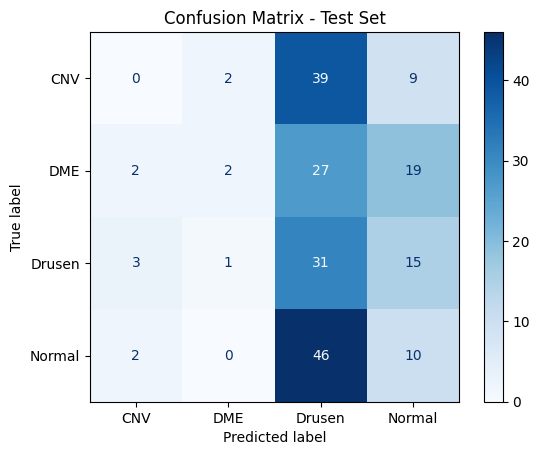

Class CNV: TP=0, FP=7, FN=50, TN=151
Class DME: TP=2, FP=3, FN=48, TN=155
Class Drusen: TP=31, FP=112, FN=19, TN=46
Class Normal: TP=10, FP=43, FN=48, TN=107


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi probabilitas kelas dari data test
y_pred_probs = vit_model.predict(test_generator)

# Konversi probabilitas ke label kelas (index dengan nilai tertinggi)
y_pred = np.argmax(y_pred_probs, axis=1)

# Label asli dari test_generator
y_true = test_generator.classes

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Buat visualisasi confusion matrix
class_names = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Hitung TP, FP, FN, TN untuk tiap kelas
num_classes = cm.shape[0]
for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = np.sum(cm) - (TP + FP + FN)
    print(f"Class {class_names[i]}: TP={TP}, FP={FP}, FN={FN}, TN={TN}")

In [ ]:
# Prediksi probabilitas kelas dari data test
y_pred_probs = vit_model.predict(test_generator)

# Konversi probabilitas ke label kelas (index dengan nilai tertinggi)
y_pred = np.argmax(y_pred_probs, axis=1)

# Label asli dari test_generator
y_true = test_generator.classes

# Hitung akurasi
accuracy = accuracy_score(y_true, y_pred)

# Hitung precision, recall, f1-score per kelas dan rata-rata macro
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Akurasi: {accuracy:.4f}")
print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-score (macro): {f1:.4f}")

# Atau untuk laporan lengkap per kelas:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step
Akurasi: 0.2067
Precision (macro): 0.2014
Recall (macro): 0.2081
F1-score (macro): 0.1435

Classification Report:
              precision    recall  f1-score   support

         CNV       0.00      0.00      0.00        50
         DME       0.40      0.04      0.07        50
      Drusen       0.22      0.62      0.32        50
      Normal       0.19      0.17      0.18        58

    accuracy                           0.21       208
   macro avg       0.20      0.21      0.14       208
weighted avg       0.20      0.21      0.14       208



#keras pre trained version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Mendefinisikan ukuran target gambar dan batch size
image_size = (224, 224)
batch_size = 32

# Membuat ImageDataGenerator dengan normalisasi pixel
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi pixel ke rentang 0-1

# Memuat gambar dari folder dengan resize otomatis
generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/TA_Dataset/Balanced',
    target_size=image_size,       # Resize gambar menjadi 224x224 piksel
    batch_size=batch_size,
    class_mode='categorical'      # Untuk klasifikasi multi-kelas
)

Found 12000 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# === Konfigurasi ===
image_size = (224, 224)
batch_size = 32
directory = '/content/drive/MyDrive/TA_Dataset/Balanced'

# === Langkah 1: Periksa apakah folder ada dan valid ===
if not os.path.exists(directory):
    raise FileNotFoundError(f"Folder tidak ditemukan: {directory}")

# Tampilkan daftar kategori (subfolder) di dalam folder utama
print("📂 Kategori yang ditemukan dalam folder:")
categories = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
if not categories:
    raise ValueError("Tidak ada subfolder ditemukan. Pastikan folder terdiri dari subfolder kelas.")

for i, cat in enumerate(categories):
    print(f"  {i+1}. {cat}")

# === Langkah 2: Hitung jumlah gambar per kategori ===
print("\n📊 Jumlah gambar per kategori:")
total_images = 0
for cat in categories:
    cat_path = os.path.join(directory, cat)
    image_count = len([f for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
    print(f"  {cat}: {image_count} gambar")
    total_images += image_count

print(f"\n✅ Total gambar yang ditemukan: {total_images}")

# === Langkah 3: Buat generator ImageDataGenerator ===
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi pixel ke [0, 1]

generator = datagen.flow_from_directory(
    directory=directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,  # Mengacak gambar untuk pelatihan
    seed=42        # Untuk reproducibility
)

# === Tambahan: Tampilkan informasi dari generator ===
print(f"\n🔍 Info Generator:")
print(f"  - Jumlah kelas: {generator.num_classes}")
print(f"  - Jumlah batch per epoch: {generator.__len__()}")
print(f"  - Nama kelas: {list(generator.class_indices.keys())}")
print(f"  - Mapping kelas: {generator.class_indices}")

📂 Kategori yang ditemukan dalam folder:
  1. NORMAL
  2. DRUSEN
  3. DME
  4. CNV

📊 Jumlah gambar per kategori:
  NORMAL: 3000 gambar
  DRUSEN: 3000 gambar
  DME: 3000 gambar
  CNV: 3000 gambar

✅ Total gambar yang ditemukan: 12000
Found 12000 images belonging to 4 classes.

🔍 Info Generator:
  - Jumlah kelas: 4
  - Jumlah batch per epoch: 375
  - Nama kelas: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
  - Mapping kelas: {'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}


📦 Total kelas: 4
🔍 Kategori: ['NORMAL', 'DRUSEN', 'DME', 'CNV']

📊 Jumlah gambar per kelas:
  NORMAL: 3000 gambar
  DRUSEN: 3000 gambar
  DME: 3000 gambar
  CNV: 3000 gambar

✅ Total gambar: 12000


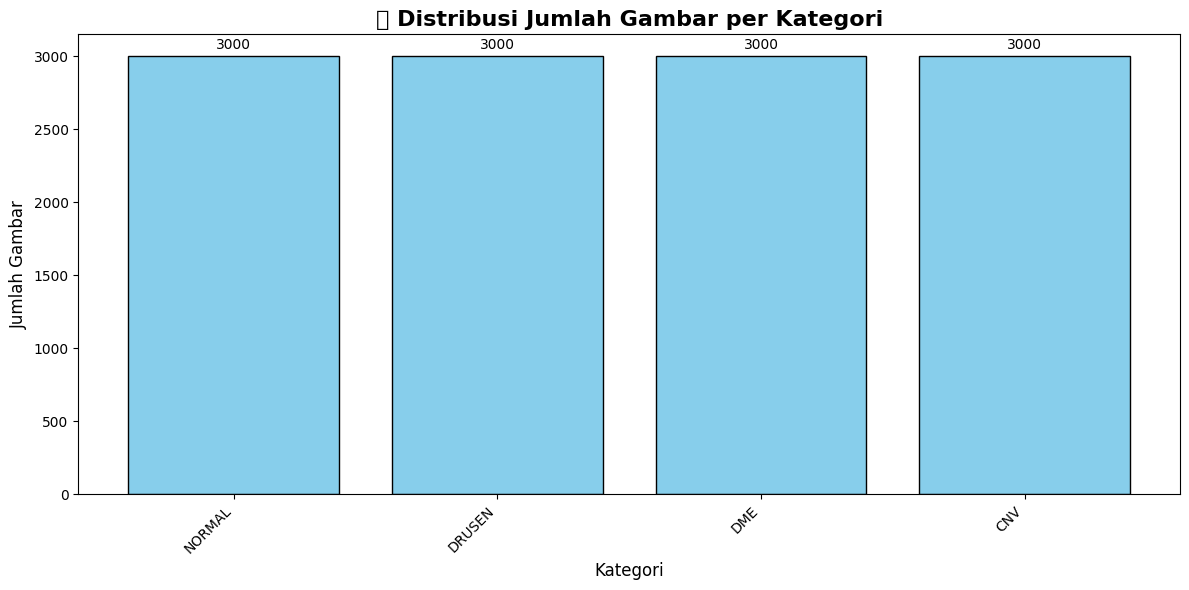

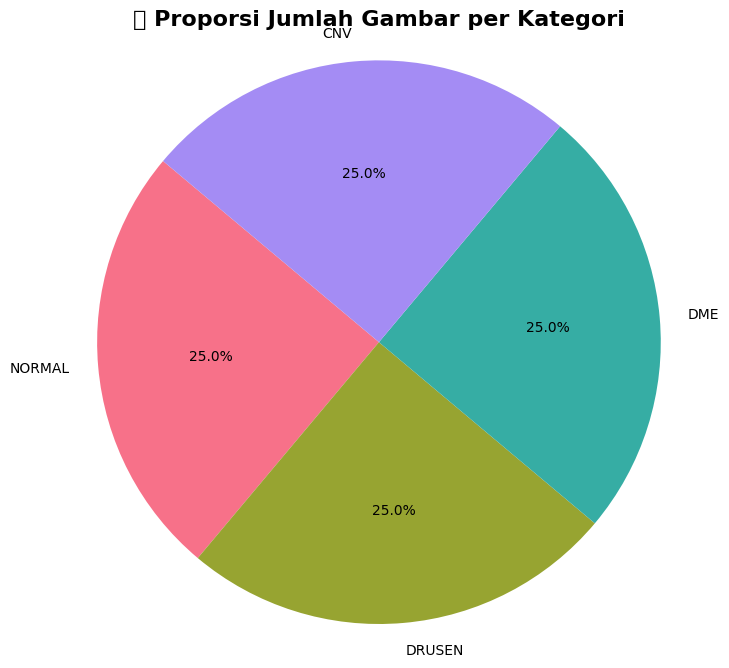


📈 Statistik Distribusi Klasifikasi:
  - Kategori terbanyak: NORMAL (3000 gambar)
  - Kategori paling sedikit: NORMAL (3000 gambar)
  - Rata-rata gambar per kelas: 3000.00
  - Deviasi standar: 0.00
  - Rasio kelas terbesar : terkecil = 1.00:1

🖼️ Contoh Gambar dari Setiap Kategori:
Found 12000 images belonging to 4 classes.


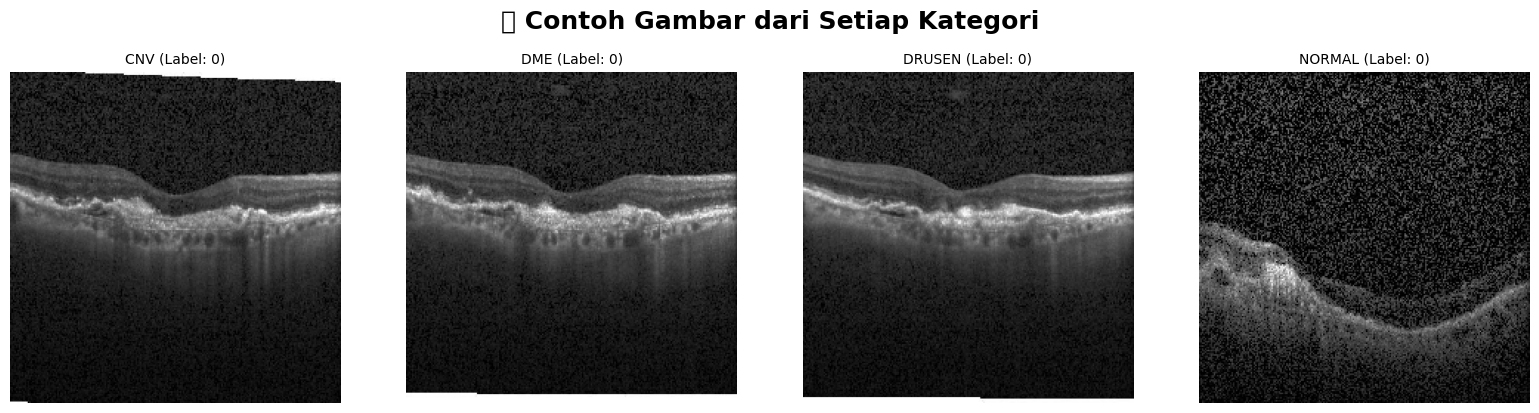

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# === Konfigurasi ===
image_size = (224, 224)
batch_size = 32
directory = '/content/drive/MyDrive/TA_Dataset/Balanced'

# === 1. Validasi folder dan ambil daftar kategori ===
if not os.path.exists(directory):
    raise FileNotFoundError(f"Folder tidak ditemukan: {directory}")

categories = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
if not categories:
    raise ValueError("Tidak ada subfolder kelas ditemukan.")

print(f"📦 Total kelas: {len(categories)}")
print(f"🔍 Kategori: {categories}")

# === 2. Hitung jumlah gambar per kelas ===
class_counts = []
class_names = []

print("\n📊 Jumlah gambar per kelas:")
for cat in categories:
    cat_path = os.path.join(directory, cat)
    img_count = len([f for f in os.listdir(cat_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))])
    class_counts.append(img_count)
    class_names.append(cat)
    print(f"  {cat}: {img_count} gambar")

total_images = sum(class_counts)
print(f"\n✅ Total gambar: {total_images}")

# === 3. Visualisasi Distribusi Kategori (Bar Plot) ===
plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, class_counts, color='skyblue', edgecolor='black')
plt.title("📈 Distribusi Jumlah Gambar per Kategori", fontsize=16, fontweight='bold')
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Tambahkan angka di atas setiap batang
for bar, count in zip(bars, class_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(class_counts)*0.01,
             f'{count}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# === 4. Visualisasi Pie Chart (Proporsi Kategori) ===
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(class_names)))
plt.title("🥧 Proporsi Jumlah Gambar per Kategori", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# === 5. Analisis Statistik Distribusi Klasifikasi ===
print("\n📈 Statistik Distribusi Klasifikasi:")
print(f"  - Kategori terbanyak: {max(class_names, key=lambda x: class_counts[class_names.index(x)])} ({max(class_counts)} gambar)")
print(f"  - Kategori paling sedikit: {min(class_names, key=lambda x: class_counts[class_names.index(x)])} ({min(class_counts)} gambar)")
print(f"  - Rata-rata gambar per kelas: {np.mean(class_counts):.2f}")
print(f"  - Deviasi standar: {np.std(class_counts):.2f}")
print(f"  - Rasio kelas terbesar : terkecil = {max(class_counts)/min(class_counts):.2f}:1")



# === 6. Visualisasi Contoh Gambar dari Setiap Kelas ===
print("\n🖼️ Contoh Gambar dari Setiap Kategori:")

# Gunakan generator untuk ambil batch pertama
datagen = ImageDataGenerator(rescale=1./255)
generator = datagen.flow_from_directory(
    directory=directory,
    target_size=image_size,
    batch_size=8,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

# Ambil satu batch pertama
images, labels = next(generator)
class_indices = list(generator.class_indices.keys())
image_per_row = 4

num_classes = len(class_indices)
num_rows = (num_classes + image_per_row - 1) // image_per_row

plt.figure(figsize=(16, 4 * num_rows))

for i in range(num_classes):
    # Ambil gambar dari kelas i
    class_img = images[i]
    class_name = class_indices[i]

    plt.subplot(num_rows, image_per_row, i+1)
    plt.imshow(class_img)
    plt.title(f"{class_name} (Label: {np.argmax(labels[i])})", fontsize=10)
    plt.axis('off')

plt.suptitle("🖼️ Contoh Gambar dari Setiap Kategori", fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()



In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the base directory where the dataset is stored
base_dir = "/content/drive/MyDrive/TA_Dataset/Balanced"

# List the classes
classes = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

# Define the directories for training, validation, and testing
train_dir = "/content/dataset_split/train"
val_dir = "/content/dataset_split/val"
test_dir = "/content/dataset_split/test"

# Create the directories if they don't exist
for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)

    # Create class folders inside train, val, test directories
    for class_name in classes:
        class_train_dir = os.path.join(train_dir, class_name)
        class_val_dir = os.path.join(val_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)

        os.makedirs(class_train_dir, exist_ok=True)
        os.makedirs(class_val_dir, exist_ok=True)
        os.makedirs(class_test_dir, exist_ok=True)

# Function to split data for each class
def split_data(class_name):
    # Get all images in the class folder
    class_folder = os.path.join(base_dir, class_name)
    images = os.listdir(class_folder)

    # Split the images into 70% train, 10% validation, 20% test
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)  # 50% of 20% -> 10% for validation

    # Copy the images into the appropriate folders
    for image in train_images:
        shutil.copy(os.path.join(class_folder, image), os.path.join(train_dir, class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_folder, image), os.path.join(val_dir, class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_folder, image), os.path.join(test_dir, class_name, image))

# Split the data for each class
for class_name in classes:
    split_data(class_name)

print("Data split complete!")

Data split complete!


In [ ]:
!pip install -q keras-cv tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 35.6 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_cv

IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 42
NUM_CLASSES = 4

train_dir = "/content/dataset_split/train"
val_dir   = "/content/dataset_split/val"
test_dir  = "/content/dataset_split/test"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int",
    seed=SEED
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int",
    seed=SEED
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)

Found 9600 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.
Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

augment = keras.Sequential([
    # Resize sedikit lebih besar dulu
    layers.Resizing(256, 256),

    # Random crop ke 224x224 (inti RandomResizedCrop)
    layers.RandomCrop(224, 224),

    # Flip horizontal
    layers.RandomFlip("horizontal"),

    # Rotasi kecil (≤5%)
    layers.RandomRotation(0.05),
], name="augment")

def vit_normalize(x):
    x = tf.cast(x, tf.float32) / 255.0
    return (x - 0.5) / 0.5


In [ ]:
def preprocess_train(images, labels):
    images = augment(images)
    images = vit_normalize(images)
    return images, labels

def preprocess_eval(images, labels):
    images = vit_normalize(images)
    return images, labels

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(preprocess_train, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
val_ds   = val_ds.map(preprocess_eval,   num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
test_ds  = test_ds.map(preprocess_eval,  num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from transformers import TFViTModel

IMG_SIZE = 224
NUM_CLASSES = 4

vit = TFViTModel.from_pretrained(
    "facebook/deit-small-patch16-224",
    from_pt=True,
    use_safetensors=False
)

class ViTClassifier(keras.Model):
    def __init__(self, vit, num_classes=4, dropout=0.4):
        super().__init__()
        self.vit = vit
        self.drop = layers.Dropout(dropout)
        self.fc = layers.Dense(num_classes, activation="softmax")

    def call(self, x, training=False):
        # x dari tf.data umumnya NHWC: (B, H, W, C)
        # Beberapa TFViTModel mengira input NCHW lalu transpose -> bikin salah.
        # Jadi kita ubah ke NCHW agar transposenya "nyambung".
        x = tf.transpose(x, perm=[0, 3, 1, 2])  # (B, C, H, W)

        out = self.vit(pixel_values=x, training=training)
        cls = out.last_hidden_state[:, 0, :]   # CLS token
        cls = self.drop(cls, training=training)
        return self.fc(cls)

vit.trainable = False
model = ViTClassifier(vit, NUM_CLASSES, dropout=0.4)

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/88.3M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=2, min_lr=1e-6),
    keras.callbacks.ModelCheckpoint("deit_small_best.keras", monitor="val_accuracy", save_best_only=True),
]

model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_head = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

# Fine-tune halus
vit.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 146s 338ms/step - accuracy: 0.3273 - loss: 1.7319 - val_accuracy: 0.5475 - val_loss: 1.0288 - learning_rate: 3.0000e-04
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 85s 280ms/step - accuracy: 0.4959 - loss: 1.1826 - val_accuracy: 0.6283 - val_loss: 0.8831 - learning_rate: 3.0000e-04
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 260ms/step - accuracy: 0.5762 - loss: 1.0316 - val_accuracy: 0.6608 - val_loss: 0.8209 - learning_rate: 3.0000e-04
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 273ms/step - accuracy: 0.6270 - loss: 0.9105 - val_accuracy: 0.6742 - val_loss: 0.7781 - learning_rate: 3.0000e-04
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 258ms/step - accuracy: 0.6651 - loss: 0.8482 - val_accuracy: 0.6992 - val_loss: 0.7510 - learning_rate: 3.0000e-04
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 96s 320ms/step - accuracy: 0.6654 - loss: 0.8245 - val_accuracy: 0.7283 - val_loss: 0.7073 - learning_rate: 3.0000e-04
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 2

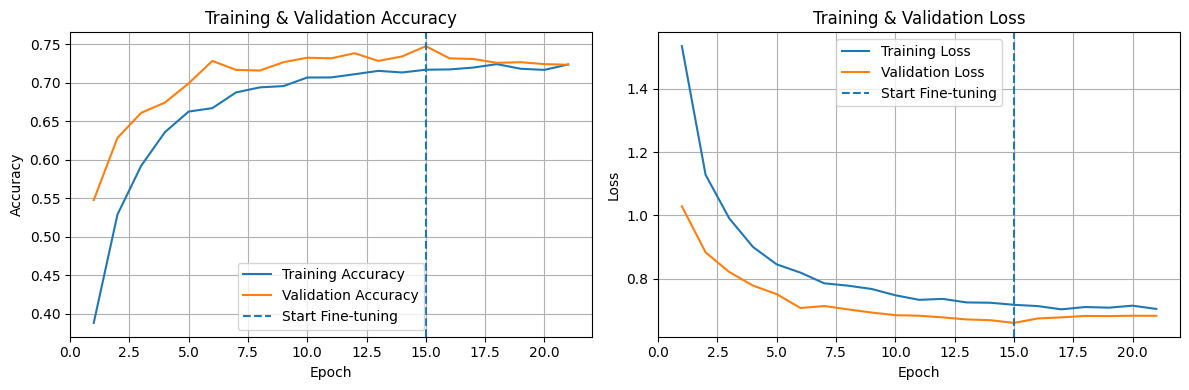

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history_head, history_ft):
    # Gabungkan history
    acc = history_head.history["accuracy"] + history_ft.history["accuracy"]
    val_acc = history_head.history["val_accuracy"] + history_ft.history["val_accuracy"]

    loss = history_head.history["loss"] + history_ft.history["loss"]
    val_loss = history_head.history["val_loss"] + history_ft.history["val_loss"]

    epochs_head = len(history_head.history["accuracy"])
    epochs_total = len(acc)

    plt.figure(figsize=(12, 4))

    # === Accuracy ===
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs_total + 1), acc, label="Training Accuracy")
    plt.plot(range(1, epochs_total + 1), val_acc, label="Validation Accuracy")
    plt.axvline(epochs_head, linestyle="--", label="Start Fine-tuning")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.grid(True)

    # === Loss ===
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs_total + 1), loss, label="Training Loss")
    plt.plot(range(1, epochs_total + 1), val_loss, label="Validation Loss")
    plt.axvline(epochs_head, linestyle="--", label="Start Fine-tuning")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history_head, history_ft)

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.7879 - loss: 0.5914
Test loss: 0.6865
Test accuracy: 0.7375


In [ ]:
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
y_prob = model.predict(test_ds, verbose=1)  # shape (N, 4)
y_pred = np.argmax(y_prob, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step


<Figure size 600x600 with 0 Axes>

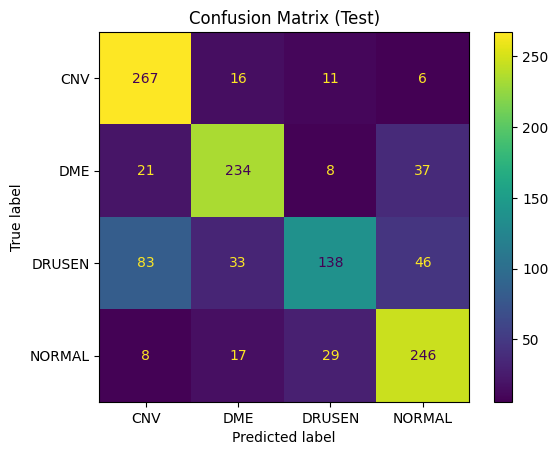

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']  # pastikan urutannya sama dg dataset

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(6,6))
disp.plot(values_format="d", cmap=None)  # tidak set warna manual
plt.title("Confusion Matrix (Test)")
plt.show()


In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[267  16  11   6]
 [ 21 234   8  37]
 [ 83  33 138  46]
 [  8  17  29 246]]


In [ ]:
metrics = []

for i, cls in enumerate(class_names):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    metrics.append({
        "Class": cls,
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN
    })

df_confusion = pd.DataFrame(metrics)
df_confusion

Class   TP   FP   FN   TN
0     CNV  267  112   33  788
1     DME  234   66   66  834
2  DRUSEN  138   48  162  852
3  NORMAL  246   89   54  811

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


              precision    recall  f1-score   support

         CNV     0.7045    0.8900    0.7865       300
         DME     0.7800    0.7800    0.7800       300
      DRUSEN     0.7419    0.4600    0.5679       300
      NORMAL     0.7343    0.8200    0.7748       300

    accuracy                         0.7375      1200
   macro avg     0.7402    0.7375    0.7273      1200
weighted avg     0.7402    0.7375    0.7273      1200



In [ ]:
def safe_div(a, b):
    return a / b if b != 0 else 0.0

eval_metrics = []

for row in metrics:
    TP, FP, FN, TN = row["TP"], row["FP"], row["FN"], row["TN"]

    precision = safe_div(TP, TP + FP)
    recall = safe_div(TP, TP + FN)
    f1 = safe_div(2 * precision * recall, precision + recall)
    accuracy = safe_div(TP + TN, TP + TN + FP + FN)

    eval_metrics.append({
        "Class": row["Class"],
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

df_metrics = pd.DataFrame(eval_metrics)
df_metrics



Class  Accuracy  Precision  Recall  F1-Score
0     CNV  0.879167   0.704485    0.89  0.786451
1     DME  0.890000   0.780000    0.78  0.780000
2  DRUSEN  0.825000   0.741935    0.46  0.567901
3  NORMAL  0.880833   0.734328    0.82  0.774803

In [ ]:
macro_avg = df_metrics[["Accuracy", "Precision", "Recall", "F1-Score"]].mean()

print("Macro Average:")
print(macro_avg)

Macro Average:
Accuracy     0.868750
Precision    0.740187
Recall       0.737500
F1-Score     0.727289
dtype: float64


In [ ]:
from sklearn.metrics import roc_auc_score

# one-vs-rest AUC
y_true_oh = np.eye(len(class_names))[y_true]  # one-hot
auc_ovr = roc_auc_score(y_true_oh, y_prob, multi_class="ovr")
print(f"ROC-AUC (OvR): {auc_ovr:.4f}")

ROC-AUC (OvR): 0.9233


In [ ]:
model.save("deit_small_final.keras")
model.save_weights("deit_small_weights.weights.h5")


##### (opsional) simpan laporan

In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=range(len(class_names)))
acc = accuracy_score(y_true, y_pred)

df = pd.DataFrame({
    "class": class_names,
    "precision": precision,
    "recall": recall,
    "f1": f1,
    "support": support
})

print(df)
print("accuracy:", acc)
df.to_csv("test_metrics_per_class.csv", index=False)
print("Saved: test_metrics_per_class.csv")


    class  precision  recall        f1  support
0     CNV   0.704485    0.89  0.786451      300
1     DME   0.780000    0.78  0.780000      300
2  DRUSEN   0.741935    0.46  0.567901      300
3  NORMAL   0.734328    0.82  0.774803      300
accuracy: 0.7375
Saved: test_metrics_per_class.csv


###inferensi

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import register_keras_serializable
from transformers import TFViTModel

@register_keras_serializable(package="Custom")
class ViTClassifier(keras.Model):
    def __init__(self, num_classes=4, dropout=0.4, backbone_name="facebook/deit-small-patch16-224", **kwargs):
        super().__init__(**kwargs)
        self.num_classes = num_classes
        self.dropout_rate = dropout
        self.backbone_name = backbone_name

        self.vit = TFViTModel.from_pretrained(
            backbone_name,
            from_pt=True,
            use_safetensors=False
        )
        self.drop = layers.Dropout(dropout)
        self.fc = layers.Dense(num_classes, activation="softmax")

    def call(self, x, training=False):
        x = tf.transpose(x, perm=[0, 3, 1, 2])  # NHWC -> NCHW
        out = self.vit(pixel_values=x, training=training)
        cls = out.last_hidden_state[:, 0, :]
        cls = self.drop(cls, training=training)
        return self.fc(cls)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_classes": self.num_classes,
            "dropout": self.dropout_rate,
            "backbone_name": self.backbone_name,
        })
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)


In [ ]:
model.save("vit_final.keras")

In [ ]:
loaded_model = keras.models.load_model(
    "vit_final.keras",
    custom_objects={"ViTClassifier": ViTClassifier}
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# simpan ulang versi yang rapi
loaded_model.save("vit_final_registered.keras")

In [ ]:
loaded_model2 = keras.models.load_model("vit_final_registered.keras")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing TFViTModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTModel were not initialized from the PyTorch model and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import numpy as np

class_names = ['CNV', 'DME', 'DRUSEN', 'NORMAL']

def vit_preprocess_image(image_path, img_size=224):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize(img, (img_size, img_size))
    img = tf.cast(img, tf.float32) / 255.0
    img = (img - 0.5) / 0.5
    return tf.expand_dims(img, 0)

x = vit_preprocess_image("/content/dataset_split/test/CNV/CNV-7852568-109.jpeg")
probs = loaded_model.predict(x, verbose=0)[0]
pred = class_names[int(np.argmax(probs))]
print("Pred:", pred, "Conf:", float(np.max(probs)))


Pred: CNV Conf: 0.530776858329773


In [ ]:
d = vit_preprocess_image("/content/dataset_split/test/DRUSEN/DRUSEN-1117376-2.jpeg")
probs = loaded_model.predict(d, verbose=0)[0]
pred = class_names[int(np.argmax(probs))]
print("Pred:", pred, "Conf:", float(np.max(probs)))

Pred: DRUSEN Conf: 0.45087796449661255


In [ ]:
n = vit_preprocess_image("/content/dataset_split/test/NORMAL/NORMAL-138971-6.jpeg")
probs = loaded_model.predict(n, verbose=0)[0]
pred = class_names[int(np.argmax(probs))]
print("Pred:", pred, "Conf:", float(np.max(probs)))

Pred: NORMAL Conf: 0.4709493815898895


###pre install deit pre trained model req

In [ ]:
import transformers, safetensors, tensorflow as tf
print(transformers.__version__,"   ", safetensors.__version__,"  ", tf.__version__)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

4.43.3     0.4.5    2.19.0


In [ ]:
# !pip -q uninstall -y transformers safetensors huggingface_hub tokenizers
# !pip -q install "transformers==4.43.3" "safetensors==0.4.5" "huggingface_hub==0.24.6" "tokenizers==0.19.1"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 827.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.8/434.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
diffusers 0.36.0 requires huggingface-hub<2.0,>=0.34.0, but you have huggingface-hub 0.24.6 which is incompatible.
gradio 5.50.0 requires huggingface-hub<2.0,>=0.33.5, but you have huggingface-hub 0.24.6 which is incompatible.
peft 0.18.0 requires huggingface_hub>=0.25.0, but you have huggingface-hub 0.24.6 which is incompatible.


# New ViT 2

In [ ]:
import os
import random
from pathlib import Path
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import shutil
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###EDA

In [ ]:
DATASET_EDA_DIR = "/content/drive/MyDrive/dataset_TA/extra"

class_names = sorted([
    d for d in os.listdir(DATASET_EDA_DIR)
    if os.path.isdir(os.path.join(DATASET_EDA_DIR, d))
])

data_summary = []

for cls in class_names:
    cls_path = os.path.join(DATASET_EDA_DIR, cls)
    num_images = len([
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ])
    data_summary.append({
        "Class": cls,
        "Number of Images": num_images
    })



df = pd.DataFrame(data_summary)
df


Class  Number of Images
0     CNV              6000
1     DME              6000
2  DRUSEN              6000
3  NORMAL              6000

In [ ]:
total_images = df["Number of Images"].sum()

print("Total images:", total_images)
print("Number of classes:", len(class_names))
print("Average images per class:", total_images // len(class_names))


Total images: 24000
Number of classes: 4
Average images per class: 6000


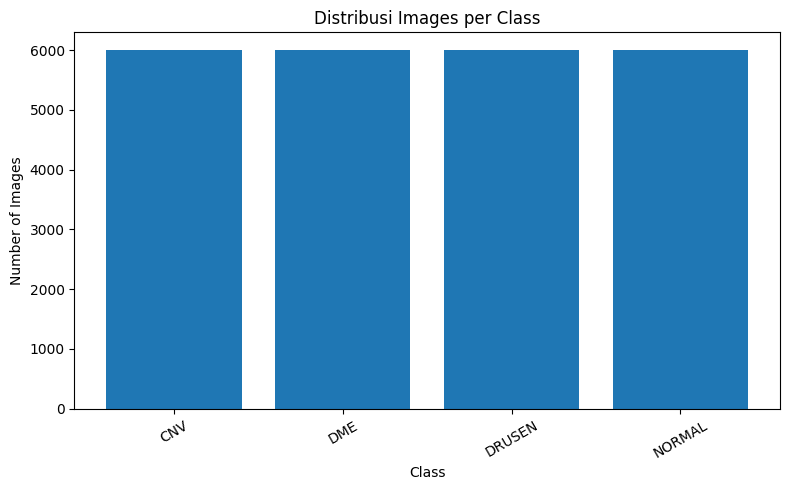

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df["Class"], df["Number of Images"])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Distribusi Images per Class")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


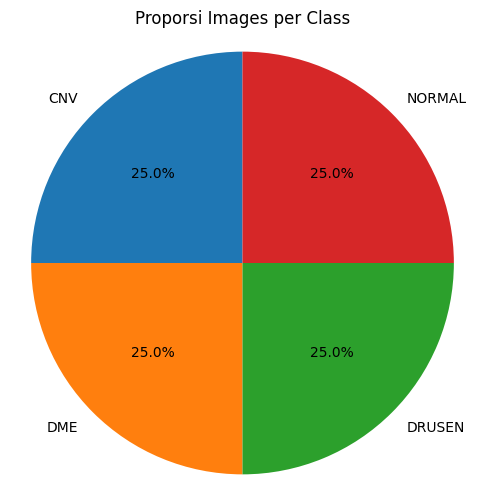

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    df["Number of Images"],
    labels=df["Class"],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Proporsi Images per Class")
plt.axis('equal')
plt.show()


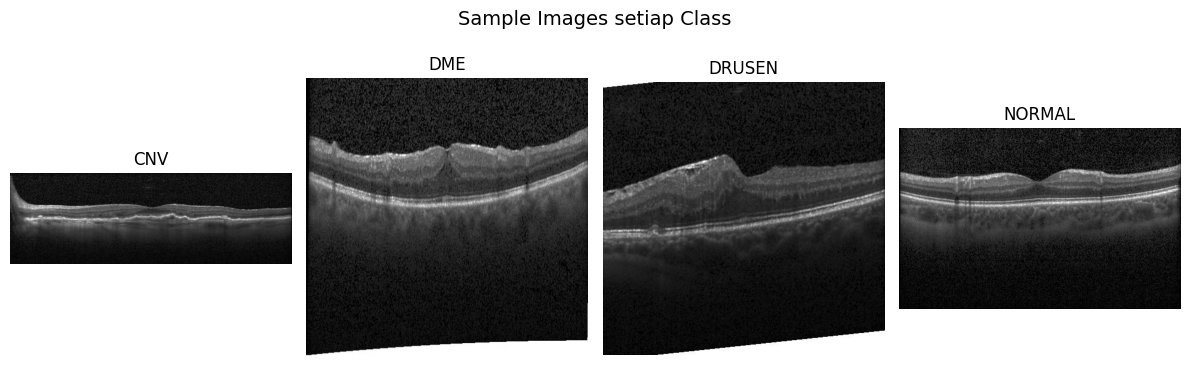

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12,4))

for i, cls in enumerate(class_names):
    cls_path = os.path.join(DATASET_EDA_DIR, cls)
    img_files = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    img_name = random.choice(img_files)
    img_path = os.path.join(cls_path, img_name)
    img = Image.open(img_path).convert("RGB")

    plt.subplot(1, len(class_names), i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.suptitle("Sample Images setiap Class", fontsize=14)
plt.tight_layout()
plt.show()


##Versi DATA split 8:1:1

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
IMG_SIZE = 224

In [ ]:
RAW_DIR = Path("/content/drive/MyDrive/dataset_TA/extra")  # folder asli
SPLIT_DIR = Path("/content/dataset_split") # output split
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

class_names = sorted([d.name for d in RAW_DIR.iterdir() if d.is_dir()])
print("Classes:", class_names)

# (opsional) standarisasi max 6000/kelas
MAX_PER_CLASS = 6000

# rasio 8:1:1
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.8, 0.1, 0.1

def list_images(class_dir):
    files = [p for p in class_dir.rglob("*")
             if p.is_file() and p.suffix.lower() in IMG_EXTS]
    return files

def prepare_dirs():
    for split in ["train","val","test"]:
        for c in class_names:
            (SPLIT_DIR/split/c).mkdir(parents=True, exist_ok=True)

prepare_dirs()

for c in class_names:
    files = list_images(RAW_DIR/c)
    random.shuffle(files)

    if MAX_PER_CLASS is not None:
        files = files[:MAX_PER_CLASS]  # memastikan 6000/kelas

    n = len(files)
    n_train = int(TRAIN_RATIO * n)
    n_val   = int(VAL_RATIO * n)
    # sisanya test

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    def copy_files(file_list, split_name):
        for p in file_list:
            dst = SPLIT_DIR/split_name/c/p.name
            shutil.copy2(p, dst)

    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(c, "-> Train:", len(train_files),' |val:', len(val_files)," |Test:", len(test_files))

print("Done split Ke:", SPLIT_DIR)

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
CNV -> Train: 4800  |val: 600  |Test: 600
DME -> Train: 4800  |val: 600  |Test: 600
DRUSEN -> Train: 4800  |val: 600  |Test: 600
NORMAL -> Train: 4800  |val: 600  |Test: 600
Done split Ke: /content/dataset_split


###data preprocessing

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")



In [ ]:
def load_ds(path, training=False):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(IMG_SIZE, IMG_SIZE),#resize
        batch_size=BATCH_SIZE,
        shuffle=training
    )

    class_names = ds.class_names  #  ambil DI SINI

    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), #normalisasi
                num_parallel_calls=AUTOTUNE)

    #augment training
    if training:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds, class_names


In [ ]:
train_ds, class_names = load_ds(SPLIT_DIR/"train", training=True)
val_ds, _ = load_ds(SPLIT_DIR/"val", training=False)
test_ds, _ = load_ds(SPLIT_DIR/"test", training=False)

print("class_names:", class_names)


Found 19200 files belonging to 4 classes.
Found 2400 files belonging to 4 classes.
Found 2400 files belonging to 4 classes.
class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


train min/max: 0.0 1.0740285


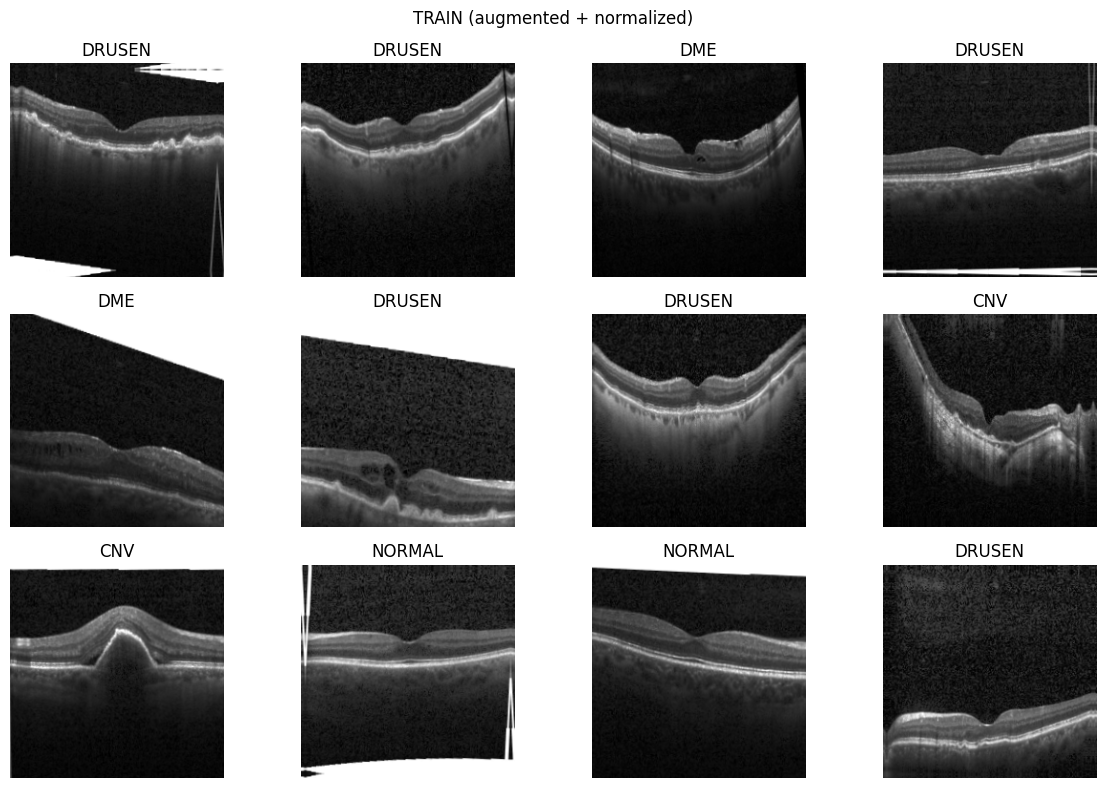

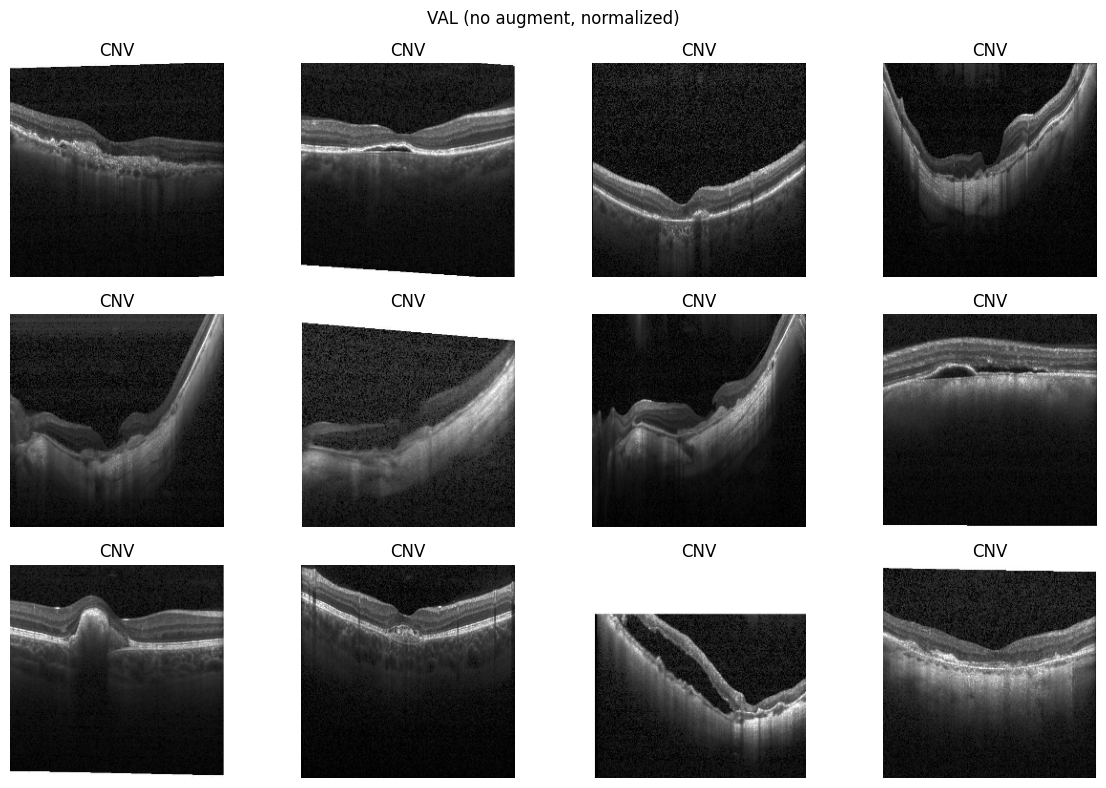

In [ ]:
for x,y in train_ds.take(1):
    print("train min/max:", tf.reduce_min(x).numpy(), tf.reduce_max(x).numpy())

import matplotlib.pyplot as plt
def show_batch(ds, title):
    plt.figure(figsize=(12,8))
    for x,y in ds.take(1):
        for i in range(12):
            plt.subplot(3,4,i+1)
            plt.imshow(x[i].numpy())
            plt.title(class_names[int(y[i])])
            plt.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_batch(train_ds, "TRAIN (augmented + normalized)")
show_batch(val_ds, "VAL (no augment, normalized)")


### BUAT MODEL ViT-Small dari 0

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=16,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)
    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) ** 2

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(embed_dim*mlp_ratio, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(dropout)(x3)
        x3 = layers.Dense(embed_dim)(x3)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="vit_small")


In [ ]:
model = build_vit_small(num_classes=len(class_names))
model.summary()

Model: "vit_small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 768) │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 384) │    370,560 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 384) │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 384) │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 384) │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None,      │          0 │ dense_1[0][0]     │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 384) │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 384) │          0 │ add[0][0],        │
│                     │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 384) │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, None,      │          0 │ dense_3[0][0]   

 Total params: 21,666,436 (82.65 MB)

 Trainable params: 21,666,436 (82.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import io

# Tangkap summary sebagai string
summary_string = io.StringIO()
model.summary(print_fn=lambda x: summary_string.write(x + '\n'))
summary_content = summary_string.getvalue()
summary_string.close()

# Simpan ke file
with open('model_summary_vit_small_2000.txt', 'w') as f:
    f.write(summary_content)

In [ ]:
import tensorflow as tf
from tensorflow import keras

NUM_CLASSES = len(class_names)

def to_one_hot(images, labels):
    return images, tf.one_hot(labels, NUM_CLASSES)

train_ds_oh = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_oh   = val_ds.map(to_one_hot,   num_parallel_calls=tf.data.AUTOTUNE)
test_ds_oh  = test_ds.map(to_one_hot,  num_parallel_calls=tf.data.AUTOTUNE)  # untuk evaluasi nanti

train_ds_oh = train_ds_oh.prefetch(tf.data.AUTOTUNE)
val_ds_oh   = val_ds_oh.prefetch(tf.data.AUTOTUNE)
test_ds_oh  = test_ds_oh.prefetch(tf.data.AUTOTUNE)


In [ ]:
for x, y in train_ds_oh.take(1):
    print("images:", x.shape)        # (batch, 224, 224, 3)
    print("labels:", y.shape)        # (batch, NUM_CLASSES)
    print("example label:", y[0].numpy())
    print("sum label:", tf.reduce_sum(y[0]).numpy())  # harus 1.0


images: (64, 224, 224, 3)
labels: (64, 4)
example label: [0. 0. 0. 1.]
sum label: 1.0


In [ ]:
EPOCHS = 50

steps_per_epoch = tf.data.experimental.cardinality(train_ds_oh).numpy()
if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
    raise ValueError("Dataset cardinality infinite. Pastikan train_ds tidak di-repeat tanpa batas.")
if steps_per_epoch == tf.data.experimental.UNKNOWN_CARDINALITY:
    raise ValueError("Dataset cardinality unknown. Coba hilangkan cache/transform yang bikin unknown, atau set steps_per_epoch manual.")

total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)


In [ ]:
loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [ ]:
class SaveAtEpochs(keras.callbacks.Callback):
    def __init__(self, save_epochs, save_dir="epoch_checkpoints_V811"):
        super().__init__()
        self.save_epochs = set(save_epochs)   # {20, 40, 50}
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        epoch_human = epoch + 1
        if epoch_human in self.save_epochs:
            path = os.path.join(
                self.save_dir,
                f"vit_16p_811_epoch_{epoch_human:02d}.keras"
            )
            self.model.save(path)
            print(f"\nSaved checkpoint di epoch {epoch_human} -> {path}")


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=40,
        restore_best_weights=False,
        verbose=1
    ),
    SaveAtEpochs(
        save_epochs=[20, 40, 50],
        save_dir="epoch_checkpoints_V811"
    )
]


In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    train_ds_oh,
    validation_data=val_ds_oh,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 372s 973ms/step - accuracy: 0.2564 - loss: 1.7928 - val_accuracy: 0.2896 - val_loss: 1.4154
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 287s 951ms/step - accuracy: 0.2864 - loss: 1.4144 - val_accuracy: 0.3275 - val_loss: 1.3352
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 286s 951ms/step - accuracy: 0.3683 - loss: 1.3337 - val_accuracy: 0.4575 - val_loss: 1.2126
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 319s 940ms/step - accuracy: 0.4536 - loss: 1.2276 - val_accuracy: 0.5325 - val_loss: 1.1379
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.5362 - loss: 1.1273 - val_accuracy: 0.6037 - val_loss: 1.0238
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 280s 930ms/step - accuracy: 0.5919 - loss: 1.0467 - val_accuracy: 0.6413 - val_loss: 0.9752
Epoch 7/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 285s 946ms/step - accuracy: 0.6382 - loss: 0.9824 - val_accuracy: 0.6354 - val_loss: 0.9756
Epoch 8/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 320s 937ms/step - accuracy: 0.6707 - lo

In [ ]:
model.save("final_vit_model_16p_811.keras")


####evaluasi

In [ ]:
import numpy as np
import tensorflow as tf

def collect_preds(ds, model):
    y_true_list = []
    y_prob_list = []

    for x_batch, y_batch in ds:
        probs = model.predict(x_batch, verbose=0)
        y_prob_list.append(probs)

        yb = y_batch.numpy()
        # Jika y_batch one-hot -> ambil argmax, jika integer -> langsung
        if len(yb.shape) == 2:
            y_true_list.append(np.argmax(yb, axis=1))
        else:
            y_true_list.append(yb)

    y_true = np.concatenate(y_true_list, axis=0)
    y_prob = np.concatenate(y_prob_list, axis=0)
    y_pred = np.argmax(y_prob, axis=1)
    return y_true, y_pred, y_prob

In [ ]:
ds_for_eval = test_ds
#ds_for_eval = test_ds_oh

In [ ]:
y_true, y_pred, y_prob = collect_preds(ds_for_eval, model)
num_classes = len(class_names)

print("Total test samples:", len(y_true))
print("Num classes:", num_classes)


Total test samples: 2400
Num classes: 4


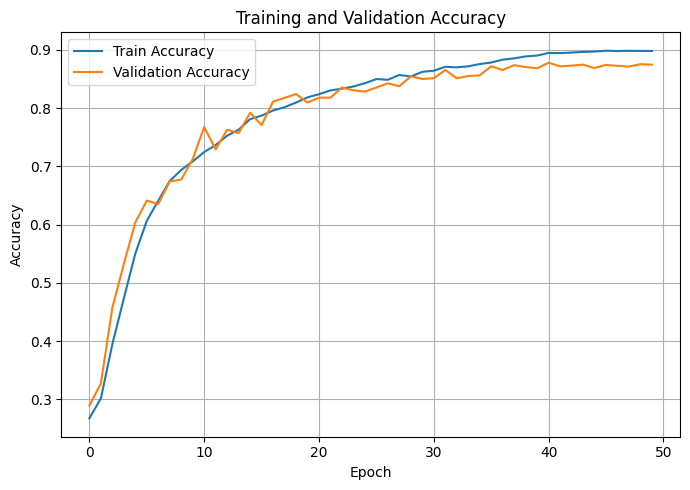

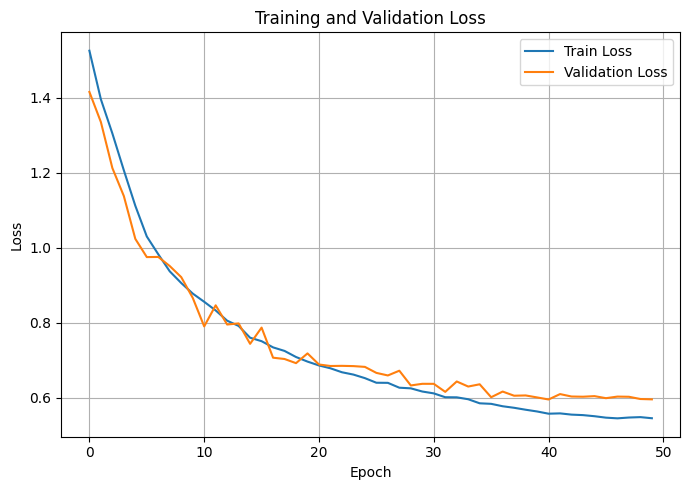

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


confusion matrix

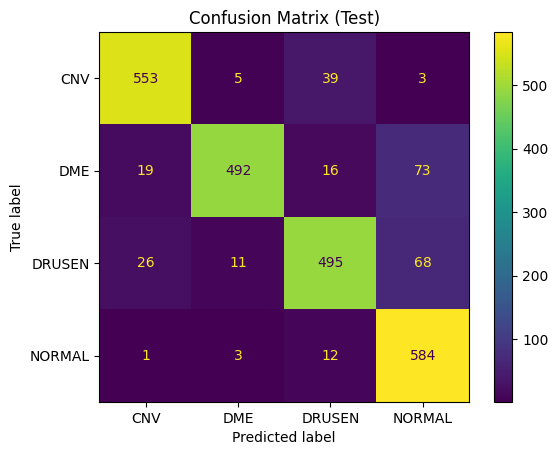


Classification Report:
              precision    recall  f1-score   support

         CNV     0.9232    0.9217    0.9224       600
         DME     0.9628    0.8200    0.8857       600
      DRUSEN     0.8808    0.8250    0.8520       600
      NORMAL     0.8022    0.9733    0.8795       600

    accuracy                         0.8850      2400
   macro avg     0.8923    0.8850    0.8849      2400
weighted avg     0.8923    0.8850    0.8849      2400



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


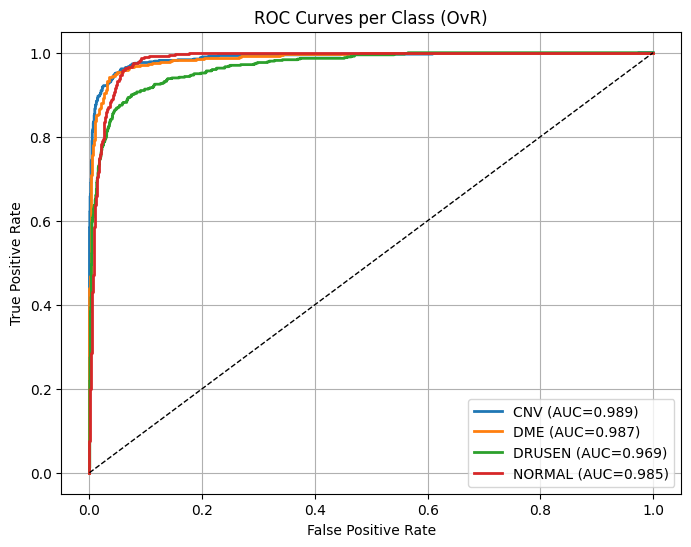


ROC–AUC per kelas:
- CNV: 0.9885
- DME: 0.9874
- DRUSEN: 0.9686
- NORMAL: 0.9846
Macro ROC–AUC: 0.9822710648148149


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nROC–AUC per kelas:")
for i in range(num_classes):
    print(f"- {class_names[i]}: {roc_auc[i]:.4f}")
print("Macro ROC–AUC:", float(np.mean(list(roc_auc.values()))))


In [ ]:
def sensitivity_specificity(cm, class_names):
    results = []
    total = cm.sum()
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = total - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        results.append({
            "class": class_names[i],
            "Sensitivity": sensitivity,
            "Specificity": specificity
        })

    return results


In [ ]:
results = sensitivity_specificity(cm, class_names)

print("\nSensitivity & Specificity per kelas:")
for r in results:
    print(
        f"- {r['class']:10s} | "
        f"Sensitivity: {r['Sensitivity']:.4f} | "
        f"Specificity: {r['Specificity']:.4f}"
    )

# Macro average
macro_sens = np.mean([r["Sensitivity"] for r in results])
macro_spec = np.mean([r["Specificity"] for r in results])

print("\nMacro Average:")
print(f"Sensitivity (macro): {macro_sens:.4f}")
print(f"Specificity (macro): {macro_spec:.4f}")


Sensitivity & Specificity per kelas:
- CNV        | Sensitivity: 0.9217 | Specificity: 0.9744
- DME        | Sensitivity: 0.8200 | Specificity: 0.9894
- DRUSEN     | Sensitivity: 0.8250 | Specificity: 0.9628
- NORMAL     | Sensitivity: 0.9733 | Specificity: 0.9200

Macro Average:
Sensitivity (macro): 0.8850
Specificity (macro): 0.9617


inferensi

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim": self.embed_dim
        })
        return config


In [ ]:
modelload = keras.models.load_model(
    "/content/final_vit_model_16p_811.keras",
    custom_objects={
        "Patches": Patches,
        "PatchEncoder": PatchEncoder
    },
    compile=False
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [ ]:
import os

SPLIT_DIR = "/content/dataset_split"  # ganti sesuai path split kamu
class_names = sorted(os.listdir(f"{SPLIT_DIR}/train"))
print("class_names:", class_names)


class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
import numpy as np
from PIL import Image

IMG_SIZE = 224

def predict_image(model, img_path, class_names, img_size=224):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))
    x = np.array(img).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)  # (1,224,224,3)

    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]

    return pred_label, probs


In [ ]:
img_path = "/content/dataset_split/test/CNV/CNV-9206635-74.jpeg"  # ganti ke dir gambar OCT yang mau di pilih
label, probs = predict_image(modelload, img_path, class_names)

print("Predicted:", label)
print("Probabilities:")
for c, p in zip(class_names, probs):
    print(f"  {c:8s}: {p:.4f}")


Predicted: CNV
Probabilities:
  CNV     : 0.9297
  DME     : 0.0232
  DRUSEN  : 0.0217
  NORMAL  : 0.0254


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 224

# =========================
# Mapping rekomendasi terapi
# =========================
THERAPY_RECOMMENDATION = {
    "cnv": [
        "Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.",
        "Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.",
        "Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu."
    ],
    "dme": [
        "Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.",
        "Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.",
        "Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.",
        "Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.",
        "Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif."
    ],
    "drusen": [
        "Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.",
        "Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.",
        "Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF."
    ]
}


def predict_top1_with_therapy(model, img_path, class_names, img_size=224):
    # --- Preprocess ---
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_size, img_size))
    x = np.array(img_resized).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # --- Predict ---
    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]
    confidence = float(probs[pred_idx])

    # --- Tampilkan gambar ---
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_label.upper()}\nConfidence: {confidence:.4f}")
    plt.show()

    # --- Rekomendasi terapi ---
    label_key = pred_label.lower()
    recommendations = THERAPY_RECOMMENDATION.get(label_key, [])

    print("=== HASIL INFERENSI MODEL ===")
    print(f"Kelas Prediksi : {pred_label.upper()}")
    print(f"Confidence     : {confidence:.4f}\n")

    print("=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    print("\nNote:")
    print("Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.")

    return pred_label, confidence



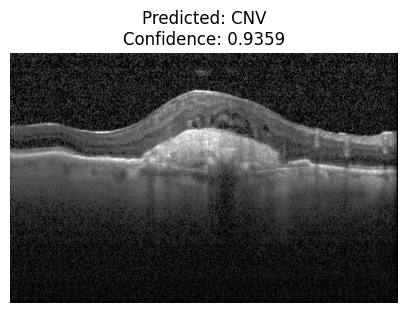

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : CNV
Confidence     : 0.9359

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.
2. Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.
3. Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu.

Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('CNV', 0.9358794093132019)

In [ ]:
img_path = "/content/dataset_split/test/CNV/CNV-9320911-157.jpeg"
predict_top1_with_therapy(modelload, img_path, class_names)

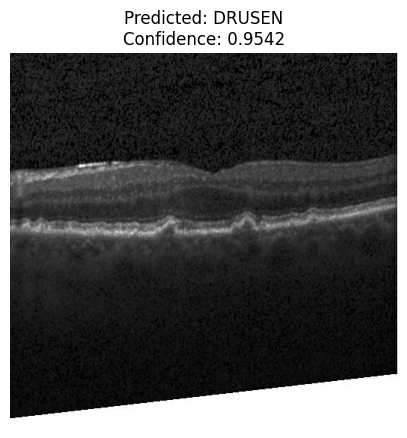

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DRUSEN
Confidence     : 0.9542

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.
2. Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.
3. Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF.

Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('DRUSEN', 0.9542328119277954)

In [ ]:
img_path = "/content/dataset_split/test/DRUSEN/DRUSEN-5801431-11.jpeg"
predict_top1_with_therapy(model, img_path, class_names)

Saving DRUSEN-8854406-4.jpeg to DRUSEN-8854406-4.jpeg


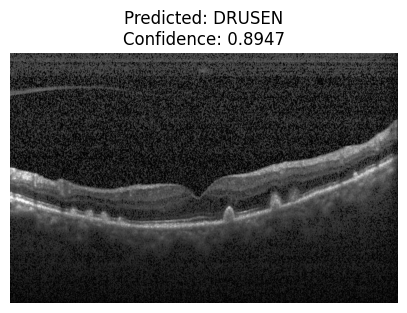

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DRUSEN
Confidence     : 0.8947

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.
2. Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.
3. Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF.

Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

pred_label, conf = predict_top1_with_therapy(model, img_path, class_names)



##Versi DATA split 7 : 1 : 2

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
IMG_SIZE = 224

RAW_DIR = Path("/content/drive/MyDrive/dataset_TA/extra")  # folder asli
SPLIT_DIR = Path("/content/dataset_split") # output split
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

class_names = sorted([d.name for d in RAW_DIR.iterdir() if d.is_dir()])
print("Classes:", class_names)

# (opsional) standarisasi max 6000/kelas
MAX_PER_CLASS = 6000

# rasio 7:1:2
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.7, 0.1, 0.2

def list_images(class_dir):
    files = [p for p in class_dir.rglob("*")
             if p.is_file() and p.suffix.lower() in IMG_EXTS]
    return files

def prepare_dirs():
    for split in ["train","val","test"]:
        for c in class_names:
            (SPLIT_DIR/split/c).mkdir(parents=True, exist_ok=True)

prepare_dirs()

for c in class_names:
    files = list_images(RAW_DIR/c)
    random.shuffle(files)

    if MAX_PER_CLASS is not None:
        files = files[:MAX_PER_CLASS]  # memastikan 6000/kelas

    n = len(files)
    n_train = int(TRAIN_RATIO * n)
    n_val   = int(VAL_RATIO * n)
    # sisanya test

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    def copy_files(file_list, split_name):
        for p in file_list:
            dst = SPLIT_DIR/split_name/c/p.name
            shutil.copy2(p, dst)

    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(c, "-> Train:", len(train_files),'|val:', len(val_files),"|Test:", len(test_files))

print("Done Data split Ke:", SPLIT_DIR)

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
CNV -> Train: 4200 |val: 600 |Test: 1200
DME -> Train: 4200 |val: 600 |Test: 1200
DRUSEN -> Train: 4200 |val: 600 |Test: 1200
NORMAL -> Train: 4200 |val: 600 |Test: 1200
Done Data split Ke: /content/dataset_split


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")

In [ ]:
def load_ds(path, training=False):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(IMG_SIZE, IMG_SIZE),#resize
        batch_size=BATCH_SIZE,
        shuffle=training
    )

    class_names = ds.class_names  #  ambil DI SINI

    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), #normalisasi
                num_parallel_calls=AUTOTUNE)

    #augment training
    if training:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds, class_names


In [ ]:
train_ds, class_names = load_ds(SPLIT_DIR/"train", training=True)
val_ds, _ = load_ds(SPLIT_DIR/"val", training=False)
test_ds, _ = load_ds(SPLIT_DIR/"test", training=False)

print("class_names:", class_names)

Found 16800 files belonging to 4 classes.
Found 2400 files belonging to 4 classes.
Found 4800 files belonging to 4 classes.
class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=16,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)
    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) ** 2

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(embed_dim*mlp_ratio, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(dropout)(x3)
        x3 = layers.Dense(embed_dim)(x3)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="vit_small")


model = build_vit_small(num_classes=len(class_names))
model.summary()

Model: "vit_small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 768) │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 384) │    370,560 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 384) │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 384) │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 384) │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None,      │          0 │ dense_1[0][0]     │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 384) │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 384) │          0 │ add[0][0],        │
│                     │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 384) │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, None,      │          0 │ dense_3[0][0]   

 Total params: 21,666,436 (82.65 MB)

 Trainable params: 21,666,436 (82.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_CLASSES = len(class_names)

def to_one_hot(images, labels):
    return images, tf.one_hot(labels, NUM_CLASSES)

train_ds_oh = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_oh   = val_ds.map(to_one_hot,   num_parallel_calls=tf.data.AUTOTUNE)
test_ds_oh  = test_ds.map(to_one_hot,  num_parallel_calls=tf.data.AUTOTUNE)  # untuk evaluasi nanti

train_ds_oh = train_ds_oh.prefetch(tf.data.AUTOTUNE)
val_ds_oh   = val_ds_oh.prefetch(tf.data.AUTOTUNE)
test_ds_oh  = test_ds_oh.prefetch(tf.data.AUTOTUNE)


In [ ]:
EPOCHS = 50

steps_per_epoch = tf.data.experimental.cardinality(train_ds_oh).numpy()
if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
    raise ValueError("Dataset cardinality infinite. Pastikan train_ds tidak di-repeat tanpa batas.")
if steps_per_epoch == tf.data.experimental.UNKNOWN_CARDINALITY:
    raise ValueError("Dataset cardinality unknown. Coba hilangkan cache/transform yang bikin unknown, atau set steps_per_epoch manual.")

total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)

loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [ ]:
class SaveAtEpochs(keras.callbacks.Callback):
    def __init__(self, save_epochs, save_dir="epoch_checkpoints_V712"):
        super().__init__()
        self.save_epochs = set(save_epochs)   # {20, 35, 50}
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        epoch_human = epoch + 1
        if epoch_human in self.save_epochs:
            path = os.path.join(
                self.save_dir,
                f"vit_epoch_{epoch_human:02d}.keras"
            )
            self.model.save(path)
            print(f"\n Saved checkpoint di epoch {epoch_human} -> {path}")


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=False,
        verbose=1
    ),
    SaveAtEpochs(
        save_epochs=[20, 35, 50],
        save_dir="epoch_checkpoints_V712"
    )
]

In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    train_ds_oh,
    validation_data=val_ds_oh,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 359s 1s/step - accuracy: 0.2537 - loss: 1.8741 - val_accuracy: 0.3067 - val_loss: 1.3896
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 245s 927ms/step - accuracy: 0.2660 - loss: 1.4286 - val_accuracy: 0.3279 - val_loss: 1.3614
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 244s 922ms/step - accuracy: 0.3175 - loss: 1.3807 - val_accuracy: 0.3967 - val_loss: 1.2927
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 259s 909ms/step - accuracy: 0.4003 - loss: 1.2981 - val_accuracy: 0.4758 - val_loss: 1.2156
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 264s 914ms/step - accuracy: 0.4561 - loss: 1.2375 - val_accuracy: 0.4421 - val_loss: 1.2310
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 242s 915ms/step - accuracy: 0.5015 - loss: 1.1762 - val_accuracy: 0.5729 - val_loss: 1.0754
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 245s 925ms/step - accuracy: 0.5685 - loss: 1.0850 - val_accuracy: 0.5350 - val_loss: 1.1259
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 240s 908ms/step - accuracy: 0.5965 - lo

In [ ]:
model.save("final_vit_model_16p_712.keras")

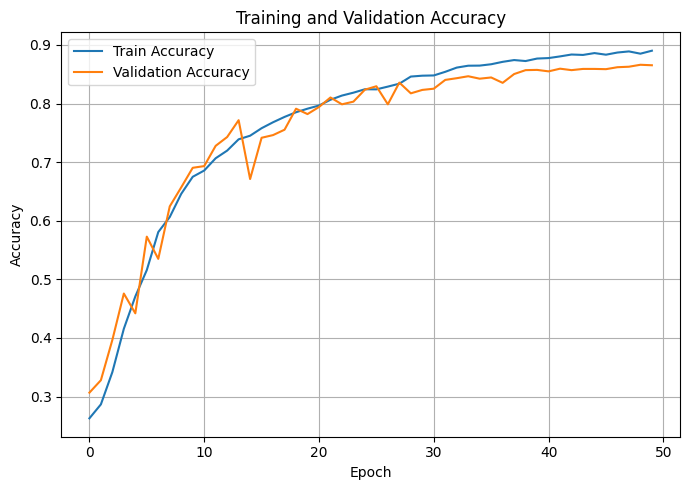

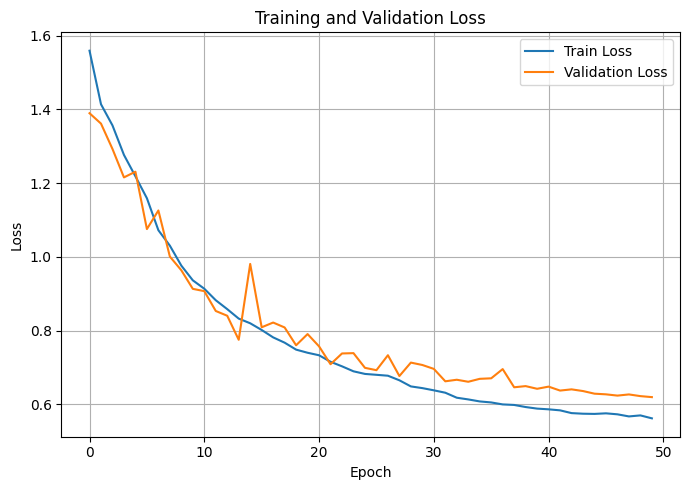

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf

def collect_preds(ds, model):
    y_true_list = []
    y_prob_list = []

    for x_batch, y_batch in ds:
        probs = model.predict(x_batch, verbose=0)
        y_prob_list.append(probs)

        yb = y_batch.numpy()
        # Jika y_batch one-hot -> ambil argmax, jika integer -> langsung
        if len(yb.shape) == 2:
            y_true_list.append(np.argmax(yb, axis=1))
        else:
            y_true_list.append(yb)

    y_true = np.concatenate(y_true_list, axis=0)
    y_prob = np.concatenate(y_prob_list, axis=0)
    y_pred = np.argmax(y_prob, axis=1)
    return y_true, y_pred, y_prob

ds_for_eval = test_ds
#ds_for_eval = test_ds_oh

y_true, y_pred, y_prob = collect_preds(ds_for_eval, model)
num_classes = len(class_names)

print("Total test samples:", len(y_true))
print("Num classes:", num_classes)


Total test samples: 4800
Num classes: 4


confusion matrix

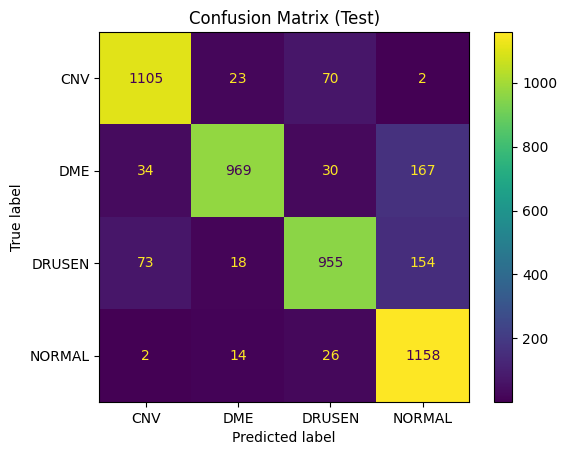


Classification Report:
              precision    recall  f1-score   support

         CNV     0.9102    0.9208    0.9155      1200
         DME     0.9463    0.8075    0.8714      1200
      DRUSEN     0.8834    0.7958    0.8374      1200
      NORMAL     0.7819    0.9650    0.8639      1200

    accuracy                         0.8723      4800
   macro avg     0.8805    0.8723    0.8720      4800
weighted avg     0.8805    0.8723    0.8720      4800



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


Roc AUc

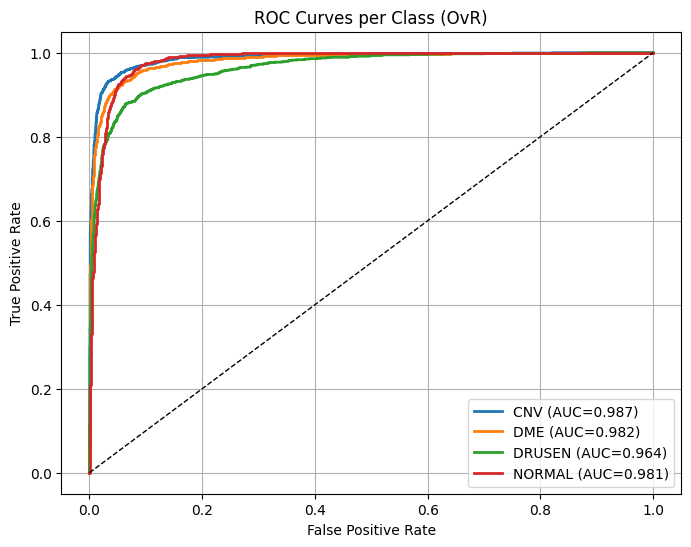


ROC–AUC per kelas:
- CNV: 0.9869
- DME: 0.9820
- DRUSEN: 0.9642
- NORMAL: 0.9810
Macro ROC–AUC: 0.9785178240740741


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nROC–AUC per kelas:")
for i in range(num_classes):
    print(f"- {class_names[i]}: {roc_auc[i]:.4f}")
print("Macro ROC–AUC:", float(np.mean(list(roc_auc.values()))))


In [ ]:
def sensitivity_specificity(cm, class_names):
    results = []
    total = cm.sum()
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = total - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        results.append({
            "class": class_names[i],
            "Sensitivity": sensitivity,
            "Specificity": specificity
        })

    return results




In [ ]:
results = sensitivity_specificity(cm, class_names)

print("\nSensitivity & Specificity per kelas:")
for r in results:
    print(
        f"- {r['class']:10s} | "
        f"Sensitivity: {r['Sensitivity']:.4f} | "
        f"Specificity: {r['Specificity']:.4f}"
    )

# Macro average
macro_sens = np.mean([r["Sensitivity"] for r in results])
macro_spec = np.mean([r["Specificity"] for r in results])

print("\nMacro Average:")
print(f"Sensitivity (macro): {macro_sens:.4f}")
print(f"Specificity (macro): {macro_spec:.4f}")



Sensitivity & Specificity per kelas:
- CNV        | Sensitivity: 0.9208 | Specificity: 0.9697
- DME        | Sensitivity: 0.8075 | Specificity: 0.9847
- DRUSEN     | Sensitivity: 0.7958 | Specificity: 0.9650
- NORMAL     | Sensitivity: 0.9650 | Specificity: 0.9103

Macro Average:
Sensitivity (macro): 0.8723
Specificity (macro): 0.9574


inferensi

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim": self.embed_dim
        })
        return config


In [ ]:
modelload = keras.models.load_model(
    "/content/final_vit_model_16p_712.keras",
    custom_objects={
        "Patches": Patches,
        "PatchEncoder": PatchEncoder
    },
    compile=False
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [ ]:
import os

SPLIT_DIR = "/content/dataset_split"  # ganti sesuai path split kamu
class_names = sorted(os.listdir(f"{SPLIT_DIR}/train"))
print("class_names:", class_names)

class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
import numpy as np
from PIL import Image

IMG_SIZE = 224

def predict_image(model, img_path, class_names, img_size=224):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))
    x = np.array(img).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)  # (1,224,224,3)

    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]

    return pred_label, probs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 224

# =========================
# Mapping rekomendasi terapi
# =========================
THERAPY_RECOMMENDATION = {
    "cnv": [
        "Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.",
        "Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.",
        "Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu."
    ],
    "dme": [
        "Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.",
        "Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.",
        "Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.",
        "Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.",
        "Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif."
    ],
    "drusen": [
        "Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.",
        "Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.",
        "Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF."
    ]
}


def predict_top1_with_therapy(model, img_path, class_names, img_size=224):
    # --- Preprocess ---
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_size, img_size))
    x = np.array(img_resized).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # --- Predict ---
    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]
    confidence = float(probs[pred_idx])

    # --- Tampilkan gambar ---
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_label.upper()}\nConfidence: {confidence:.4f}")
    plt.show()

    # --- Rekomendasi terapi ---
    label_key = pred_label.lower()
    recommendations = THERAPY_RECOMMENDATION.get(label_key, [])

    print("=== HASIL INFERENSI MODEL ===")
    print(f"Kelas Prediksi : {pred_label.upper()}")
    print(f"Confidence     : {confidence:.4f}\n")

    print("=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    print("\n⚠️ Note:")
    print("Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.")

    return pred_label, confidence



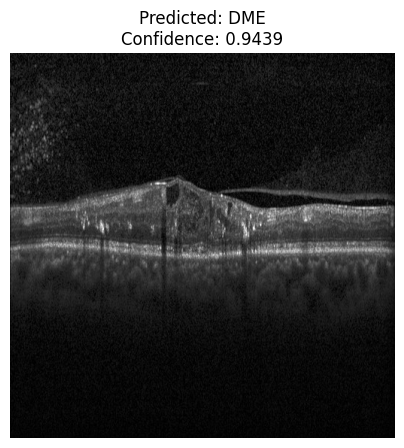

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DME
Confidence     : 0.9439

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.
2. Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.
3. Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.
4. Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.
5. Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif.

⚠️ Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('DME', 0.9439185261726379)

In [ ]:
img_path = "/content/dataset_split/test/DME/DME-3064922-198.jpeg"
predict_top1_with_therapy(modelload, img_path, class_names)

Saving DME-3064922-198.jpeg to DME-3064922-198.jpeg


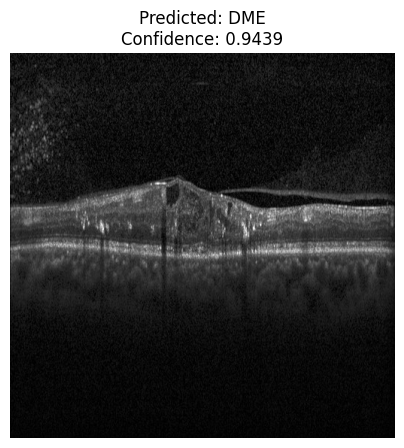

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DME
Confidence     : 0.9439

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.
2. Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.
3. Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.
4. Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.
5. Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif.

⚠️ Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

pred_label, conf = predict_top1_with_therapy(modelload, img_path, class_names)


##Versi DATA split 7 : 1,5 : 1,5

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
IMG_SIZE = 224

In [ ]:
RAW_DIR = Path("/content/drive/MyDrive/dataset_TA/extra")  # folder asli
SPLIT_DIR = Path("/content/dataset_split") # output split
IMG_EXTS = {".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}

class_names = sorted([d.name for d in RAW_DIR.iterdir() if d.is_dir()])
print("Classes:", class_names)

# (opsional) standarisasi max 6000/kelas
MAX_PER_CLASS = 6000

# rasio 7:1,5:1,5
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.7, 0.15, 0.15

def list_images(class_dir):
    files = [p for p in class_dir.rglob("*")
             if p.is_file() and p.suffix.lower() in IMG_EXTS]
    return files

def prepare_dirs():
    for split in ["train","val","test"]:
        for c in class_names:
            (SPLIT_DIR/split/c).mkdir(parents=True, exist_ok=True)

prepare_dirs()

for c in class_names:
    files = list_images(RAW_DIR/c)
    random.shuffle(files)

    if MAX_PER_CLASS is not None:
        files = files[:MAX_PER_CLASS]  # memastikan 6000/kelas

    n = len(files)
    n_train = int(TRAIN_RATIO * n)
    n_val   = int(VAL_RATIO * n)
    # sisanya test

    train_files = files[:n_train]
    val_files   = files[n_train:n_train+n_val]
    test_files  = files[n_train+n_val:]

    def copy_files(file_list, split_name):
        for p in file_list:
            dst = SPLIT_DIR/split_name/c/p.name
            shutil.copy2(p, dst)

    copy_files(train_files, "train")
    copy_files(val_files, "val")
    copy_files(test_files, "test")

    print(c, "-> Train:", len(train_files),' |val:', len(val_files)," |Test:", len(test_files))

print("Done split into:", SPLIT_DIR)

Classes: ['CNV', 'DME', 'DRUSEN', 'NORMAL']
CNV -> Train: 4200  |val: 900  |Test: 900
DME -> Train: 4200  |val: 900  |Test: 900
DRUSEN -> Train: 4200  |val: 900  |Test: 900
NORMAL -> Train: 4200  |val: 900  |Test: 900
Done split into: /content/dataset_split


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

data_augment = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.02),
    layers.RandomZoom(0.08),
    layers.RandomContrast(0.10),
], name="augment")

In [ ]:
def load_ds(path, training=False):
    ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(IMG_SIZE, IMG_SIZE),#resize
        batch_size=BATCH_SIZE,
        shuffle=training
    )

    class_names = ds.class_names  #  ambil DI SINI

    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), #normalisasi
                num_parallel_calls=AUTOTUNE)

    #augment training
    if training:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y),
                    num_parallel_calls=AUTOTUNE)

    if not training:
        ds = ds.cache()

    ds = ds.prefetch(AUTOTUNE)
    return ds, class_names


In [ ]:
train_ds, class_names = load_ds(SPLIT_DIR/"train", training=True)
val_ds, _ = load_ds(SPLIT_DIR/"val", training=False)
test_ds, _ = load_ds(SPLIT_DIR/"test", training=False)

print("class_names:", class_names)

Found 16800 files belonging to 4 classes.
Found 3600 files belonging to 4 classes.
Found 3600 files belonging to 4 classes.
class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim):
        super().__init__()
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

def build_vit_small(
    input_shape=(224,224,3),
    num_classes=4,
    patch_size=16,
    embed_dim=384,
    depth=12,
    num_heads=6,
    mlp_ratio=4,
    dropout=0.1
):
    inputs = keras.Input(shape=input_shape)
    patches = Patches(patch_size)(inputs)
    num_patches = (input_shape[0] // patch_size) ** 2

    x = PatchEncoder(num_patches, embed_dim)(patches)
    x = layers.Dropout(dropout)(x)

    for _ in range(depth):
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embed_dim // num_heads,
            dropout=dropout
        )(x1, x1)
        x2 = layers.Add()([x, attn])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(embed_dim*mlp_ratio, activation=tf.nn.gelu)(x3)
        x3 = layers.Dropout(dropout)(x3)
        x3 = layers.Dense(embed_dim)(x3)
        x = layers.Add()([x2, x3])

    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs, name="vit_small")


model = build_vit_small(num_classes=len(class_names))
model.summary()

Model: "vit_small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches (Patches)   │ (None, None, 768) │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 384) │    370,560 │ patches[0][0]     │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 384) │          0 │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 384) │        768 │ dropout[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 384) │          0 │ dropout[0][0],    │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None,      │          0 │ dense_1[0][0]     │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 384) │    590,208 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 384) │          0 │ add[0][0],        │
│                     │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 384) │    591,360 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 384) │          0 │ add_1[0][0],      │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 384) │        768 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None,      │    591,360 │ layer_normalizat… │
│                     │ 1536)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, None,      │          0 │ dense_3[0][0]   

 Total params: 21,666,436 (82.65 MB)

 Trainable params: 21,666,436 (82.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_CLASSES = len(class_names)

def to_one_hot(images, labels):
    return images, tf.one_hot(labels, NUM_CLASSES)

train_ds_oh = train_ds.map(to_one_hot, num_parallel_calls=tf.data.AUTOTUNE)
val_ds_oh   = val_ds.map(to_one_hot,   num_parallel_calls=tf.data.AUTOTUNE)
test_ds_oh  = test_ds.map(to_one_hot,  num_parallel_calls=tf.data.AUTOTUNE)  # untuk evaluasi nanti

train_ds_oh = train_ds_oh.prefetch(tf.data.AUTOTUNE)
val_ds_oh   = val_ds_oh.prefetch(tf.data.AUTOTUNE)
test_ds_oh  = test_ds_oh.prefetch(tf.data.AUTOTUNE)


In [ ]:
EPOCHS = 50

steps_per_epoch = tf.data.experimental.cardinality(train_ds_oh).numpy()
if steps_per_epoch == tf.data.experimental.INFINITE_CARDINALITY:
    raise ValueError("Dataset cardinality infinite. Pastikan train_ds tidak di-repeat tanpa batas.")
if steps_per_epoch == tf.data.experimental.UNKNOWN_CARDINALITY:
    raise ValueError("Dataset cardinality unknown. Coba hilangkan cache/transform yang bikin unknown, atau set steps_per_epoch manual.")

total_steps = steps_per_epoch * EPOCHS

lr_schedule = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-2
)

optimizer = keras.optimizers.AdamW(
    learning_rate=lr_schedule,
    weight_decay=1e-4
)

loss_fn = keras.losses.CategoricalCrossentropy(label_smoothing=0.1)

In [ ]:
class SaveAtEpochs(keras.callbacks.Callback):
    def __init__(self, save_epochs, save_dir="epoch_checkpoints_V71515"):
        super().__init__()
        self.save_epochs = set(save_epochs)   # {20, 40, 50}
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

    def on_epoch_end(self, epoch, logs=None):
        epoch_human = epoch + 1
        if epoch_human in self.save_epochs:
            path = os.path.join(
                self.save_dir,
                f"vit_epoch_{epoch_human:02d}.keras"
            )
            self.model.save(path)
            print(f"\n Saved checkpoint di epoch {epoch_human} -> {path}")


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=False,
        verbose=1
    ),
    SaveAtEpochs(
        save_epochs=[20, 40, 50],
        save_dir="epoch_checkpoints_V71515"
    )
]

In [ ]:
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=["accuracy"]
)

history = model.fit(
    train_ds_oh,
    validation_data=val_ds_oh,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.2526 - loss: 1.8742 - val_accuracy: 0.3092 - val_loss: 1.3900
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 262s 991ms/step - accuracy: 0.2661 - loss: 1.4280 - val_accuracy: 0.3350 - val_loss: 1.3679
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 260s 981ms/step - accuracy: 0.3164 - loss: 1.3823 - val_accuracy: 0.3975 - val_loss: 1.3054
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 257s 969ms/step - accuracy: 0.3727 - loss: 1.3184 - val_accuracy: 0.4192 - val_loss: 1.2629
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 256s 970ms/step - accuracy: 0.4438 - loss: 1.2505 - val_accuracy: 0.4878 - val_loss: 1.2064
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 256s 968ms/step - accuracy: 0.5314 - loss: 1.1333 - val_accuracy: 0.5853 - val_loss: 1.0790
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.5952 - loss: 1.0504 - val_accuracy: 0.6239 - val_loss: 1.0221
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 266s 984ms/step - accuracy: 0.6447 - loss:

In [ ]:
model.save("final_vit_model_16p_71515.keras")

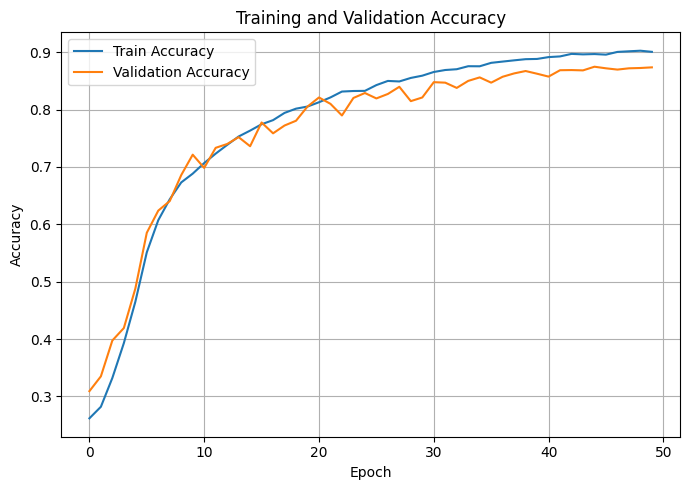

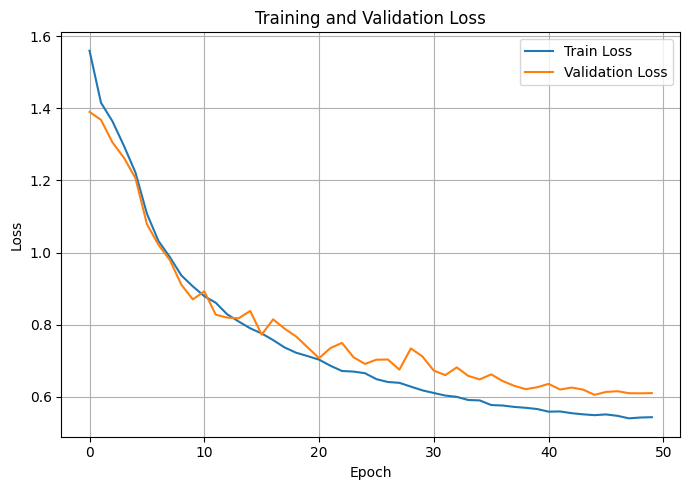

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Loss plot
plt.figure(figsize=(7,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf

def collect_preds(ds, model):
    y_true_list = []
    y_prob_list = []

    for x_batch, y_batch in ds:
        probs = model.predict(x_batch, verbose=0)
        y_prob_list.append(probs)

        yb = y_batch.numpy()
        # Jika y_batch one-hot -> ambil argmax, jika integer -> langsung
        if len(yb.shape) == 2:
            y_true_list.append(np.argmax(yb, axis=1))
        else:
            y_true_list.append(yb)

    y_true = np.concatenate(y_true_list, axis=0)
    y_prob = np.concatenate(y_prob_list, axis=0)
    y_pred = np.argmax(y_prob, axis=1)
    return y_true, y_pred, y_prob

ds_for_eval = test_ds
#ds_for_eval = test_ds_oh

y_true, y_pred, y_prob = collect_preds(ds_for_eval, model)
num_classes = len(class_names)

print("Total test samples:", len(y_true))
print("Num classes:", num_classes)


Total test samples: 3600
Num classes: 4


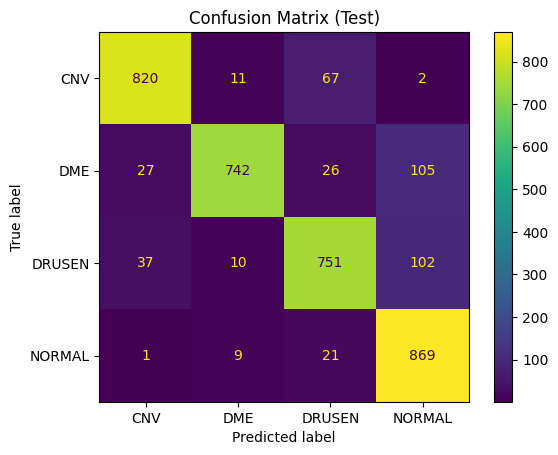


Classification Report:
              precision    recall  f1-score   support

         CNV     0.9266    0.9111    0.9188       900
         DME     0.9611    0.8244    0.8876       900
      DRUSEN     0.8682    0.8344    0.8510       900
      NORMAL     0.8061    0.9656    0.8787       900

    accuracy                         0.8839      3600
   macro avg     0.8905    0.8839    0.8840      3600
weighted avg     0.8905    0.8839    0.8840      3600



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


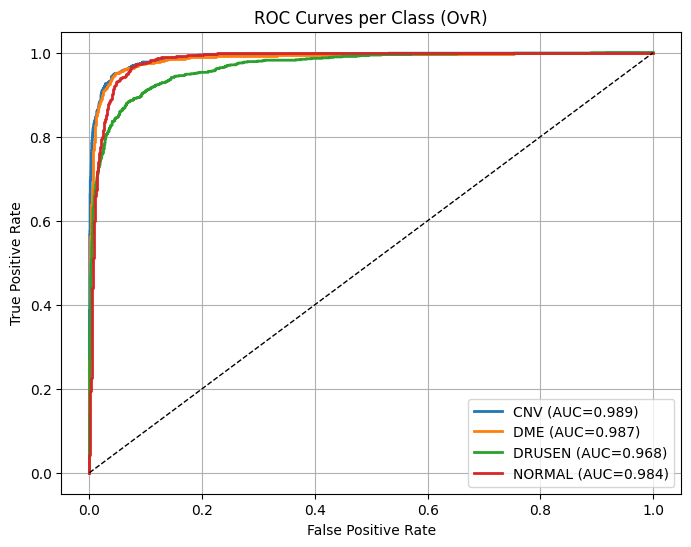


ROC–AUC per kelas:
- CNV: 0.9895
- DME: 0.9870
- DRUSEN: 0.9677
- NORMAL: 0.9839
Macro ROC–AUC: 0.9820274691358025


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{class_names[i]} (AUC={roc_auc[i]:.3f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves per Class (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nROC–AUC per kelas:")
for i in range(num_classes):
    print(f"- {class_names[i]}: {roc_auc[i]:.4f}")
print("Macro ROC–AUC:", float(np.mean(list(roc_auc.values()))))


In [ ]:
def sensitivity_specificity(cm, class_names):
    results = []
    total = cm.sum()
    num_classes = cm.shape[0]

    for i in range(num_classes):
        TP = cm[i, i]
        FN = cm[i, :].sum() - TP
        FP = cm[:, i].sum() - TP
        TN = total - (TP + FN + FP)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

        results.append({
            "class": class_names[i],
            "Sensitivity": sensitivity,
            "Specificity": specificity
        })

    return results


In [ ]:
results = sensitivity_specificity(cm, class_names)

print("\nSensitivity & Specificity per kelas:")
for r in results:
    print(
        f"- {r['class']:10s} | "
        f"Sensitivity: {r['Sensitivity']:.4f} | "
        f"Specificity: {r['Specificity']:.4f}"
    )

# Macro average
macro_sens = np.mean([r["Sensitivity"] for r in results])
macro_spec = np.mean([r["Specificity"] for r in results])

print("\nMacro Average:")
print(f"Sensitivity (macro): {macro_sens:.4f}")
print(f"Specificity (macro): {macro_spec:.4f}")



Sensitivity & Specificity per kelas:
- CNV        | Sensitivity: 0.9111 | Specificity: 0.9759
- DME        | Sensitivity: 0.8244 | Specificity: 0.9889
- DRUSEN     | Sensitivity: 0.8344 | Specificity: 0.9578
- NORMAL     | Sensitivity: 0.9656 | Specificity: 0.9226

Macro Average:
Sensitivity (macro): 0.8839
Specificity (macro): 0.9613


inferensi

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class Patches(layers.Layer):
    def __init__(self, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.patch_size = patch_size

    def call(self, images):
        b = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1,1,1,1],
            padding="VALID",
        )
        d = patches.shape[-1]
        return tf.reshape(patches, [b, -1, d])

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim = embed_dim
        self.proj = layers.Dense(embed_dim)
        self.pos_emb = layers.Embedding(num_patches, embed_dim)

    def call(self, patches):
        positions = tf.range(start=0, limit=tf.shape(patches)[1])
        return self.proj(patches) + self.pos_emb(positions)

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim": self.embed_dim
        })
        return config


In [ ]:
modelload = keras.models.load_model(
    "/content/final_vit_model_16p_71515.keras",
    custom_objects={
        "Patches": Patches,
        "PatchEncoder": PatchEncoder
    },
    compile=False
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'patch_encoder_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


In [ ]:
import os

SPLIT_DIR = "/content/dataset_split"  # ganti sesuai path split kamu
class_names = sorted(os.listdir(f"{SPLIT_DIR}/train"))
print("class_names:", class_names)

class_names: ['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [ ]:
import numpy as np
from PIL import Image

IMG_SIZE = 224

def predict_image(model, img_path, class_names, img_size=224):
    img = Image.open(img_path).convert("RGB")
    img = img.resize((img_size, img_size))
    x = np.array(img).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)  # (1,224,224,3)

    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]

    return pred_label, probs


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

IMG_SIZE = 224

# =========================
# Mapping rekomendasi terapi
# =========================
THERAPY_RECOMMENDATION = {
    "cnv": [
        "Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.",
        "Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.",
        "Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu."
    ],
    "dme": [
        "Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.",
        "Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.",
        "Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.",
        "Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.",
        "Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif."
    ],
    "drusen": [
        "Suplemen formula AREDS/AREDS2 direkomendasikan pada kondisi AMD tertentu, khususnya intermediate AMD atau drusen besar, untuk memperlambat progresi penyakit.",
        "Modifikasi gaya hidup dan pemantauan berkala diperlukan untuk mendeteksi progresi menuju AMD lanjut.",
        "Apabila berkembang menjadi AMD neovaskular dengan CNV, pendekatan terapi beralih ke anti-VEGF."
    ]
}


def predict_top1_with_therapy(model, img_path, class_names, img_size=224):
    # --- Preprocess ---
    img = Image.open(img_path).convert("RGB")
    img_resized = img.resize((img_size, img_size))
    x = np.array(img_resized).astype("float32") / 255.0
    x = np.expand_dims(x, axis=0)

    # --- Predict ---
    probs = model.predict(x, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    pred_label = class_names[pred_idx]
    confidence = float(probs[pred_idx])

    # --- Tampilkan gambar ---
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {pred_label.upper()}\nConfidence: {confidence:.4f}")
    plt.show()

    # --- Rekomendasi terapi ---
    label_key = pred_label.lower()
    recommendations = THERAPY_RECOMMENDATION.get(label_key, [])

    print("=== HASIL INFERENSI MODEL ===")
    print(f"Kelas Prediksi : {pred_label.upper()}")
    print(f"Confidence     : {confidence:.4f}\n")

    print("=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===")
    for i, rec in enumerate(recommendations, 1):
        print(f"{i}. {rec}")

    print("\n Note:")
    print("Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.")

    return pred_label, confidence



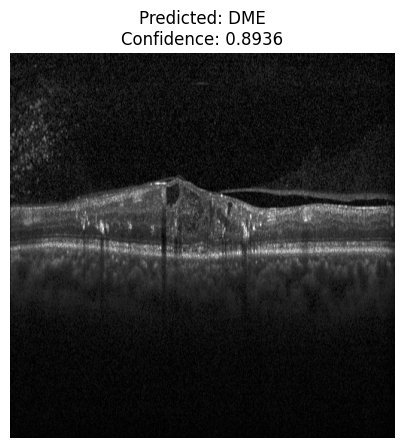

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : DME
Confidence     : 0.8936

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Anti-VEGF intravitreal merupakan terapi utama pada DME, khususnya untuk perbaikan fungsi penglihatan.
2. Kortikosteroid intravitreal dapat dipertimbangkan pada DME persisten atau kurang respons terhadap anti-VEGF, dengan pemantauan risiko peningkatan tekanan intraokular dan katarak.
3. Laser fotokoagulasi lebih sering berperan sebagai terapi adjuvan, bukan lini pertama.
4. Vitrektomi dipertimbangkan pada kasus dengan indikasi bedah tertentu, seperti adanya komponen traksi vitreomakular.
5. Kontrol faktor sistemik (glukosa darah, tekanan darah, dan lipid) merupakan bagian penting dari penatalaksanaan komprehensif.

 Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


('DME', 0.8935539722442627)

In [ ]:
img_path = "/content/dataset_split/test/DME/DME-3064922-198.jpeg"
predict_top1_with_therapy(modelload, img_path, class_names)

Saving CNV-7852568-133.jpeg to CNV-7852568-133.jpeg


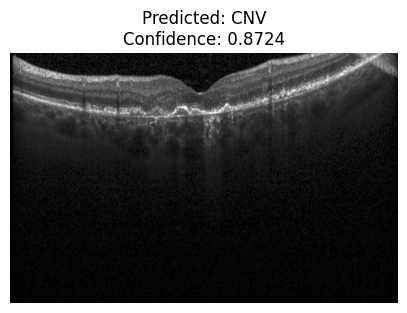

=== HASIL INFERENSI MODEL ===
Kelas Prediksi : CNV
Confidence     : 0.8724

=== REKOMENDASI TERAPI (BERDASARKAN KELAS) ===
1. Injeksi intravitreal anti-VEGF sebagai terapi utama pada CNV aktif, terutama pada CNV terkait AMD neovaskular maupun CNV miopia.
2. Monitoring respon terapi secara berkala melalui pemeriksaan klinis dan pencitraan, karena CNV sering memerlukan terapi berulang atau penyesuaian protokol.
3. Pemantauan efek samping terapi anti-VEGF diperlukan karena adanya potensi risiko okular tertentu.

 Note:
Hasil ini merupakan dukungan keputusan berbasis model AI dan tidak menggantikan penilaian klinis dokter mata.


In [ ]:
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

pred_label, conf = predict_top1_with_therapy(modelload, img_path, class_names)